In [ ]:
Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
• Country code
• Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
• Restaurant Id: Unique id of every restaurant across various cities of the world
• Restaurant Name: Name of the restaurant
• Country Code: Country in which restaurant is located
• City: City in which restaurant is located
• Address: Address of the restaurant
• Locality: Location in the city
• Locality Verbose: Detailed description of the locality
• Longitude: Longitude coordinate of the restaurant&#39;s location
• Latitude: Latitude coordinate of the restaurant&#39;s location
• Cuisines: Cuisines offered by the restaurant
• Average Cost for two: Cost for two people in different currencies ��
• Currency: Currency of the country
• Has Table booking: yes/no
• Has Online delivery: yes/ no
• Is delivering: yes/ no
• Switch to order menu: yes/no
• Price range: range of price of food
• Aggregate Rating: Average rating out of 5
• Rating color: depending upon the average rating color
• Rating text: text on the basis of rating of rating
• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range


Hint : Use pandas methods to combine all the datasets and then start working on this project.


In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading first dataframe and naming it 
df1=pd.read_excel(r"C:\Users\bee\Desktop\Data set\Country-Code.xlsx")

In [3]:
#loading second dataframe,encoding and naming it
df2=pd.read_csv(r"C:\Users\bee\Desktop\Data set\zomato.csv",encoding='latin-1')
            

In [4]:
#printing first five records of each dataframe to view and compare columns
df1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [5]:
#printing first five records of each dataframe to view and compare columns
df2.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
#printing last 5 records of dataframe
df1.tail()

,Country Code,Country
10,191,Sri Lanka
11,208,Turkey
12,214,UAE
13,215,United Kingdom
14,216,United States


In [7]:
#printing last 5 records of dataframe
df2.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [8]:
#printing a list of columns to have a clear view of columns in each dataframe
df1.columns.tolist()

['Country Code', 'Country']

In [9]:
#printing a list of columns to have a clear view of columns in each dataframe
df2.columns.tolist()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [10]:
#I confirm that the dataframes have only one column in common (Country-Code) therefore will combine them using the merge method
df=pd.merge(df1,df2,on='Country Code',how='left')

In [11]:
#check first five records of new dataframe (df)
df.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [12]:
#check last five records of new dataframe (df)
df.tail()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,216,United States,17697389,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,...,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,216,United States,17697424,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,216,United States,17697332,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,216,United States,17694056,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9550,216,United States,17559793,Fishpatrick's Crabby Cafe,Winchester Bay,"196 Bayfront Loop, Winchester Bay, OR 97467",Winchester Bay,"Winchester Bay, Winchester Bay",-124.175346,43.678998,...,Dollar($),No,No,No,No,2,3.2,Orange,Average,16


In [13]:
#checking the shape of data
df.shape

(9551, 22)

In [14]:
df.columns.tolist()

['Country Code',
 'Country',
 'Restaurant ID',
 'Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [15]:
#check if the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [16]:
#Checking Duplicate value in data set
print("Total Duplicate Rows are",df.duplicated().sum())# no duplicates

Total Duplicate Rows are 0


In [19]:
#Checking unique values of each columns
df.nunique().to_frame("No. of Unique values")#I can clearly see the number of uniques values per each column

,No. of Unique values
Country Code,15
Country,15
Restaurant ID,9551
Restaurant Name,7446
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677


In [20]:
#checking the value of count of each column(this is to get count of frequency of each unique value in column)
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64


Country
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: count, dtype: int64


Restaurant ID
3400025     1
309811      1
18460981    1
18287389    1
1629        1
           ..
4096        1
18358700    1
2217        1
18398571    1
17559793    1
Name: count, Length: 9551, dtype: int64


Restaurant Name
Cafe Coffee Day                       83
Domino's Pizza                        79
Subway                                63
Green Chick Chop                      51
McDonald

In [ ]:
Country Code-code 1 has the highest frequency
Country name-India is the most common country in the dataset 
Restaurant ID-these are unique values with a frequency of 1
Restaurant Name-Cafe Coffee Day is the common restaurant
City-New Delhi is the most common city
Address-the most frequent addresses are Sector 41, Noida and Dilli Haat, INA, New Delhirespectively
Locality-the most frequent locality is Connaught Place 
Locality Verbose-the most frequent locality verbose is Connaught Place, New Delhi
Longitude-the most frequent is 0
Latitude-the most frequent is 0
Cuisines-North Indian cuisine is the most common
Average Cost for two-the most common is 500
Currency-Indian Rupees(Rs.) is the most frequently currency quoted
Has Table booking-it is common that most restaurants have no table booking
Has Online delivery-it is common that most restaurants have no online booking
Is delivering now-it is common that most restaurants have no delivery
Switch to order menu-it is common that most restaurants have no Switch to order menu
Price range-range 1 is the most freuent price range
Aggregate rating-the most common is rating is 0
Rating color-Orange is the most common rating color
Rating text-most restaurants are rated average
Votes-0 votes are the most common

In [49]:
#checking for null values
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<Axes: >

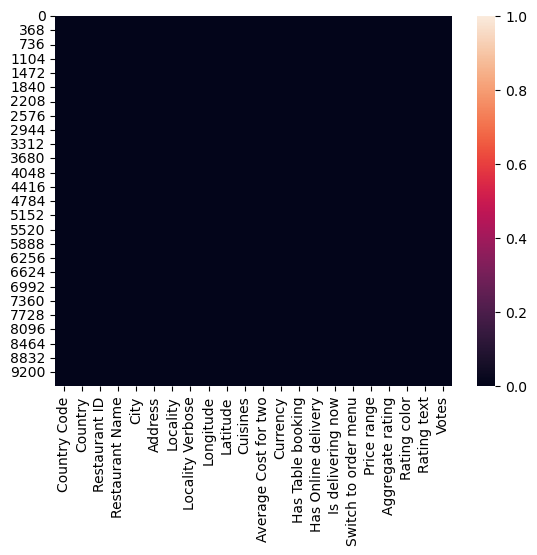

In [48]:
#checking null values using the heatmap
sns.heatmap(df.isnull())#no null values

In [21]:
#dropping uneccessary columns
#Country Code-we have country name whicw will serve the same purpose for data analysis
#Restaurant ID-it is a mere lavbel that does not have impact on target variables
#Address-the city will work as a better representation for location
#Locality Verbose
#Switch to order menu-it has one category therefore no basis for comparison to gauge impact on the target variables
#Aggregate rating-Rating text serves the same purpose
#Rating color-Rating text serves the same purpose as a perfomance indicator for the restaurant
df = df.drop(columns=['Country Code', 'Restaurant ID','Address','Locality Verbose','Switch to order menu','Aggregate rating','Rating color'])

In [22]:
#check data shape after removing some columns
df.shape

(9551, 15)

In [23]:
#checking data information again
df.info()
#all the data types look ok so I will proceed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               9551 non-null   object 
 1   Restaurant Name       9551 non-null   object 
 2   City                  9551 non-null   object 
 3   Locality              9551 non-null   object 
 4   Longitude             9551 non-null   float64
 5   Latitude              9551 non-null   float64
 6   Cuisines              9542 non-null   object 
 7   Average Cost for two  9551 non-null   int64  
 8   Currency              9551 non-null   object 
 9   Has Table booking     9551 non-null   object 
 10  Has Online delivery   9551 non-null   object 
 11  Is delivering now     9551 non-null   object 
 12  Price range           9551 non-null   int64  
 13  Rating text           9551 non-null   object 
 14  Votes                 9551 non-null   int64  
dtypes: float64(2), int64(

In [27]:
#Statistical summary of numerical columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Longitude,9551.0,64.126574,41.467058,-157.948486,77.081343,77.191964,77.282006,174.832089
Latitude,9551.0,25.854381,11.007935,-41.330428,28.478713,28.570469,28.642758,55.976980
Average Cost for two,9551.0,1199.210763,16121.183073,0.000000,250.000000,400.000000,700.000000,800000.000000
Price range,9551.0,1.804837,0.905609,1.000000,1.000000,2.000000,2.000000,4.000000
Votes,9551.0,156.909748,430.169145,0.000000,5.000000,31.000000,131.000000,10934.000000


In [ ]:
General view

#from the statistical description above the count of all columns are similar therefore no missing data values
#where mean value of a column is greater than the median(second percentile)the data is skewed to the right.Notably,Average Cost for two and votes.This will be dealt with later.
#in the following columns respectively,latitude,longitude and Price range  the mean is less than median demonstrating that the data is skewed to the left
#In all columns there are huge differences between the third percentile and max values which signify the existance of outliers in the data. 

Column specific statistical view

Longitude- The average value is 64.12 ranging  from a minimum of -157.94 a maximum of 174.83.
    
Latitude- The average value is 25.85 ranging  from a minimum of -41.33 a maximum of 55.97.
    
Average Cost for two-The maen value is 1199.21 ranging  from a minimum of 0 a maximum of 800000

Price range-The mean value is 1.80 ranging  from a minimum of 1 a maximum of 4

Votes-The average number is 156.90 ranging  from a minimum of 0 a maximum of 10934

In [28]:
#Summary of columns with categorical data
df.describe(include='object')

,Country,Restaurant Name,City,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Rating text
count,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551
unique,15,7446,141,1208,1825,12,2,2,2,6
top,India,Cafe Coffee Day,New Delhi,Connaught Place,North Indian,Indian Rupees(Rs.),No,No,No,Average
freq,8652,83,5473,122,936,8652,8393,7100,9517,3737


In [ ]:
#from the statistical description above the count of all columns are similar therefore no missing data values

In [93]:
#Split between Categorical and Numerical columns

categorical = ['Country','Price range','Restaurant Name', 'City','Locality','Cuisines','Currency','Has Table booking','Has Online delivery','Is delivering now','Rating text']
numerical = ['Longitude', 'Latitude', 'Average Cost for two','Votes']

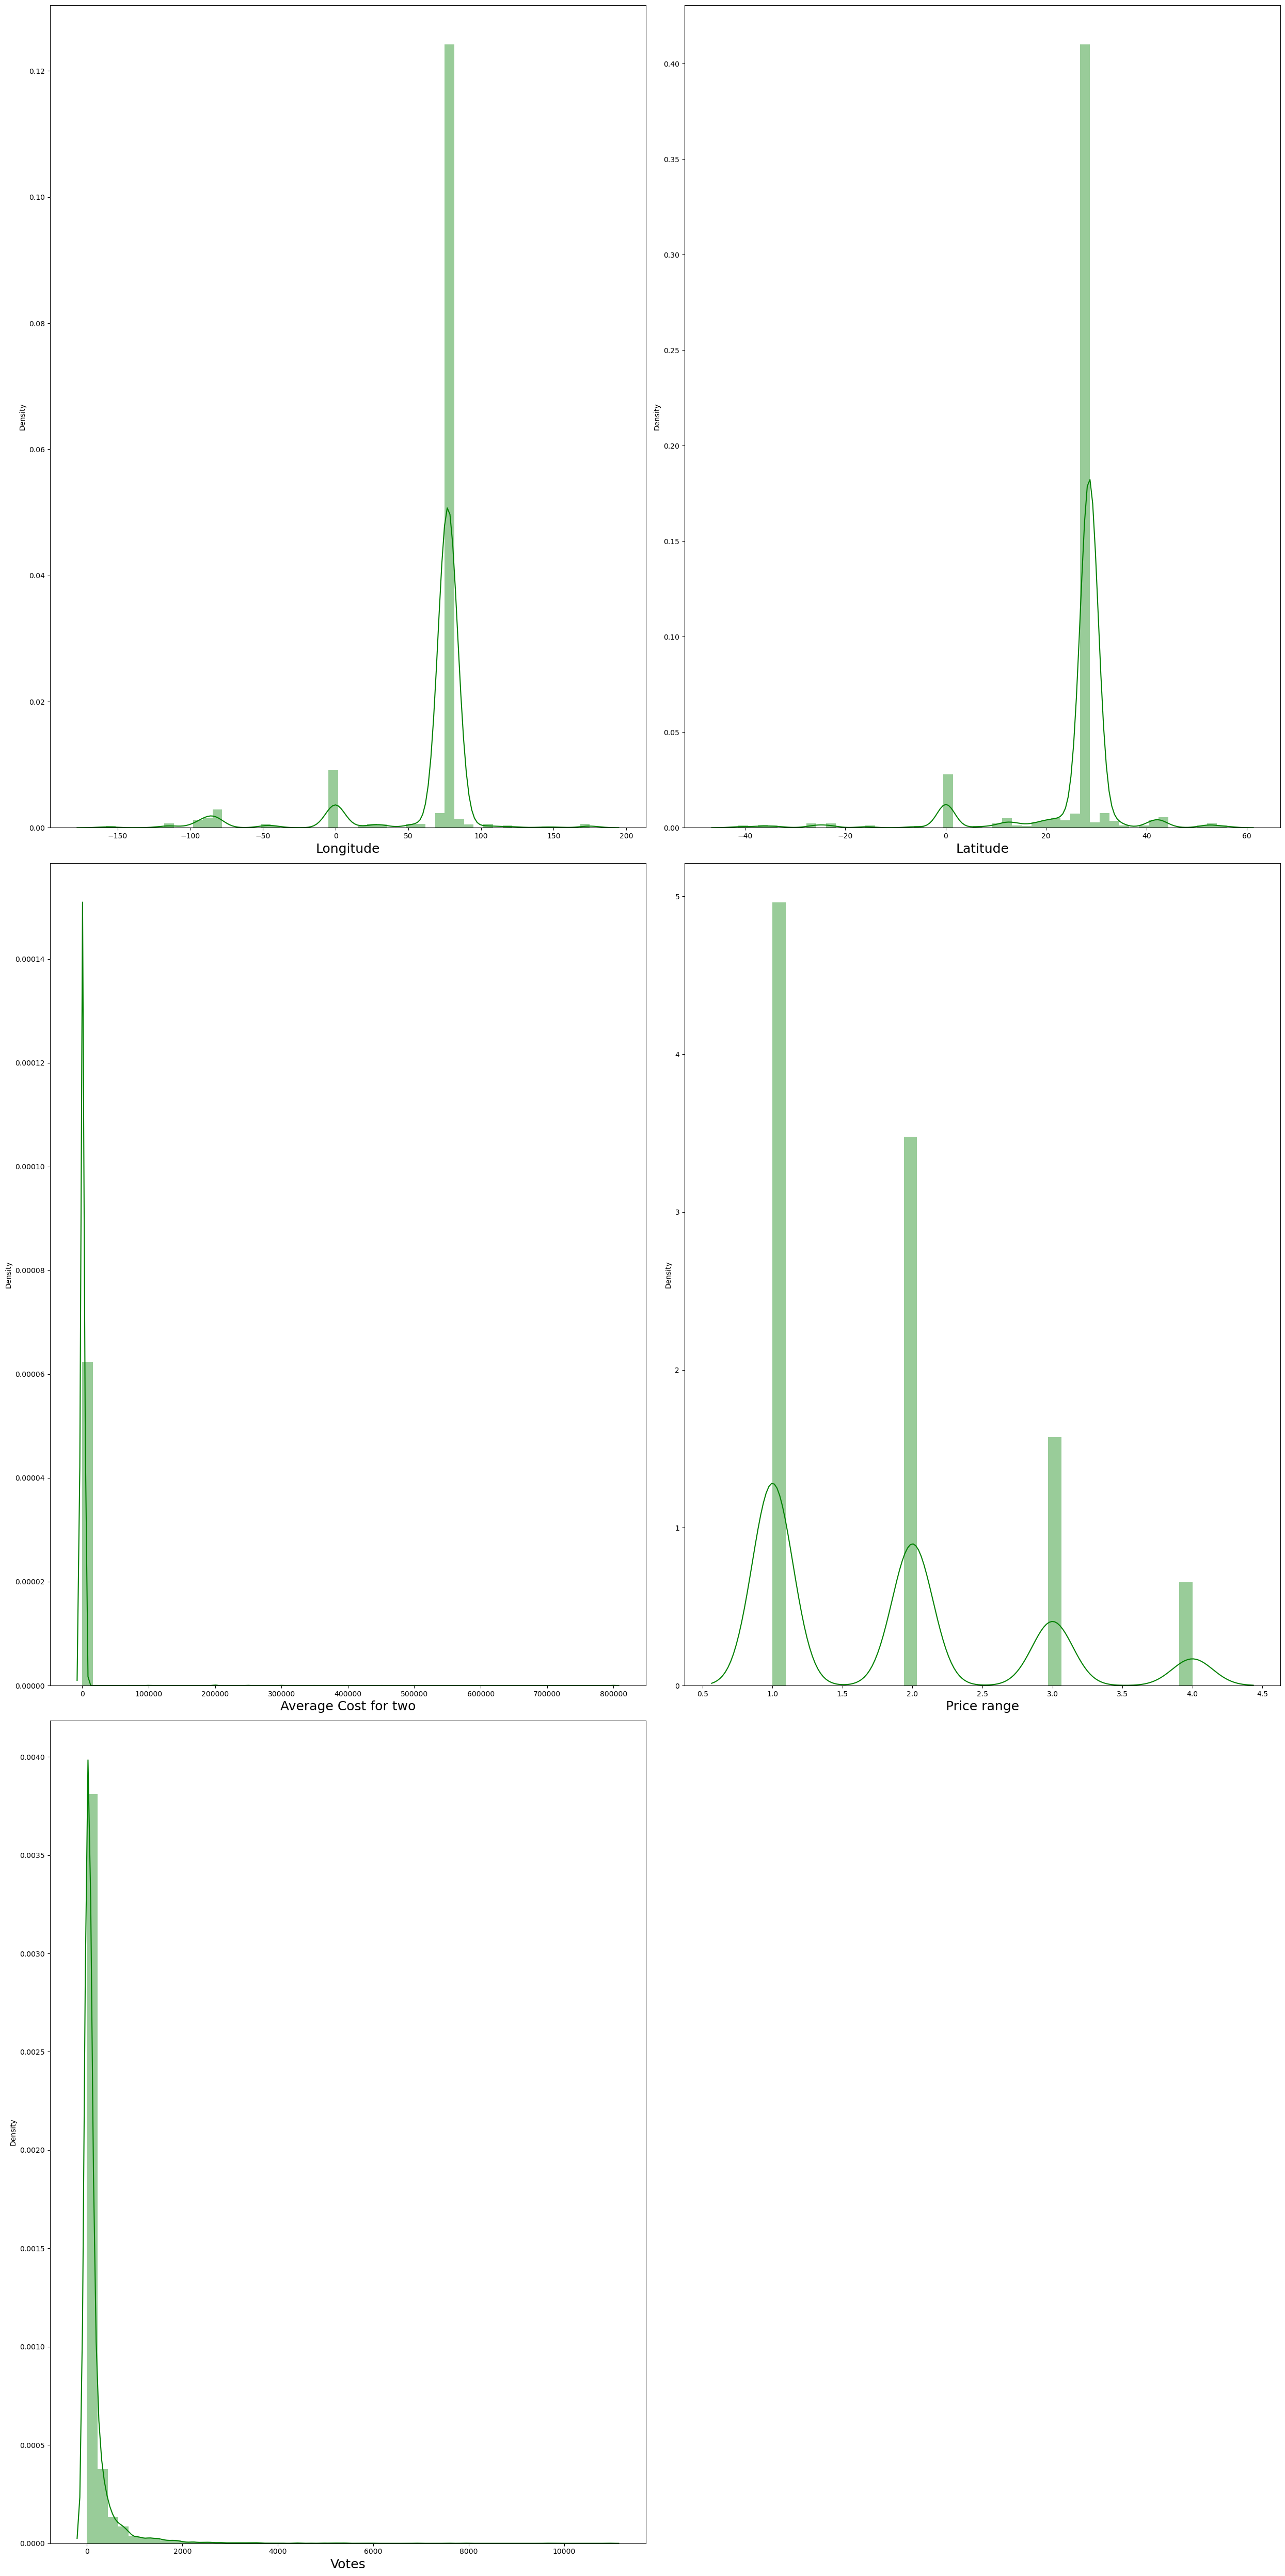

In [37]:
#Checking the distribution of data using distribution plot
#I see a lot of skeweness which will be explained below and dealt with later

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column], color = 'green')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.tight_layout()

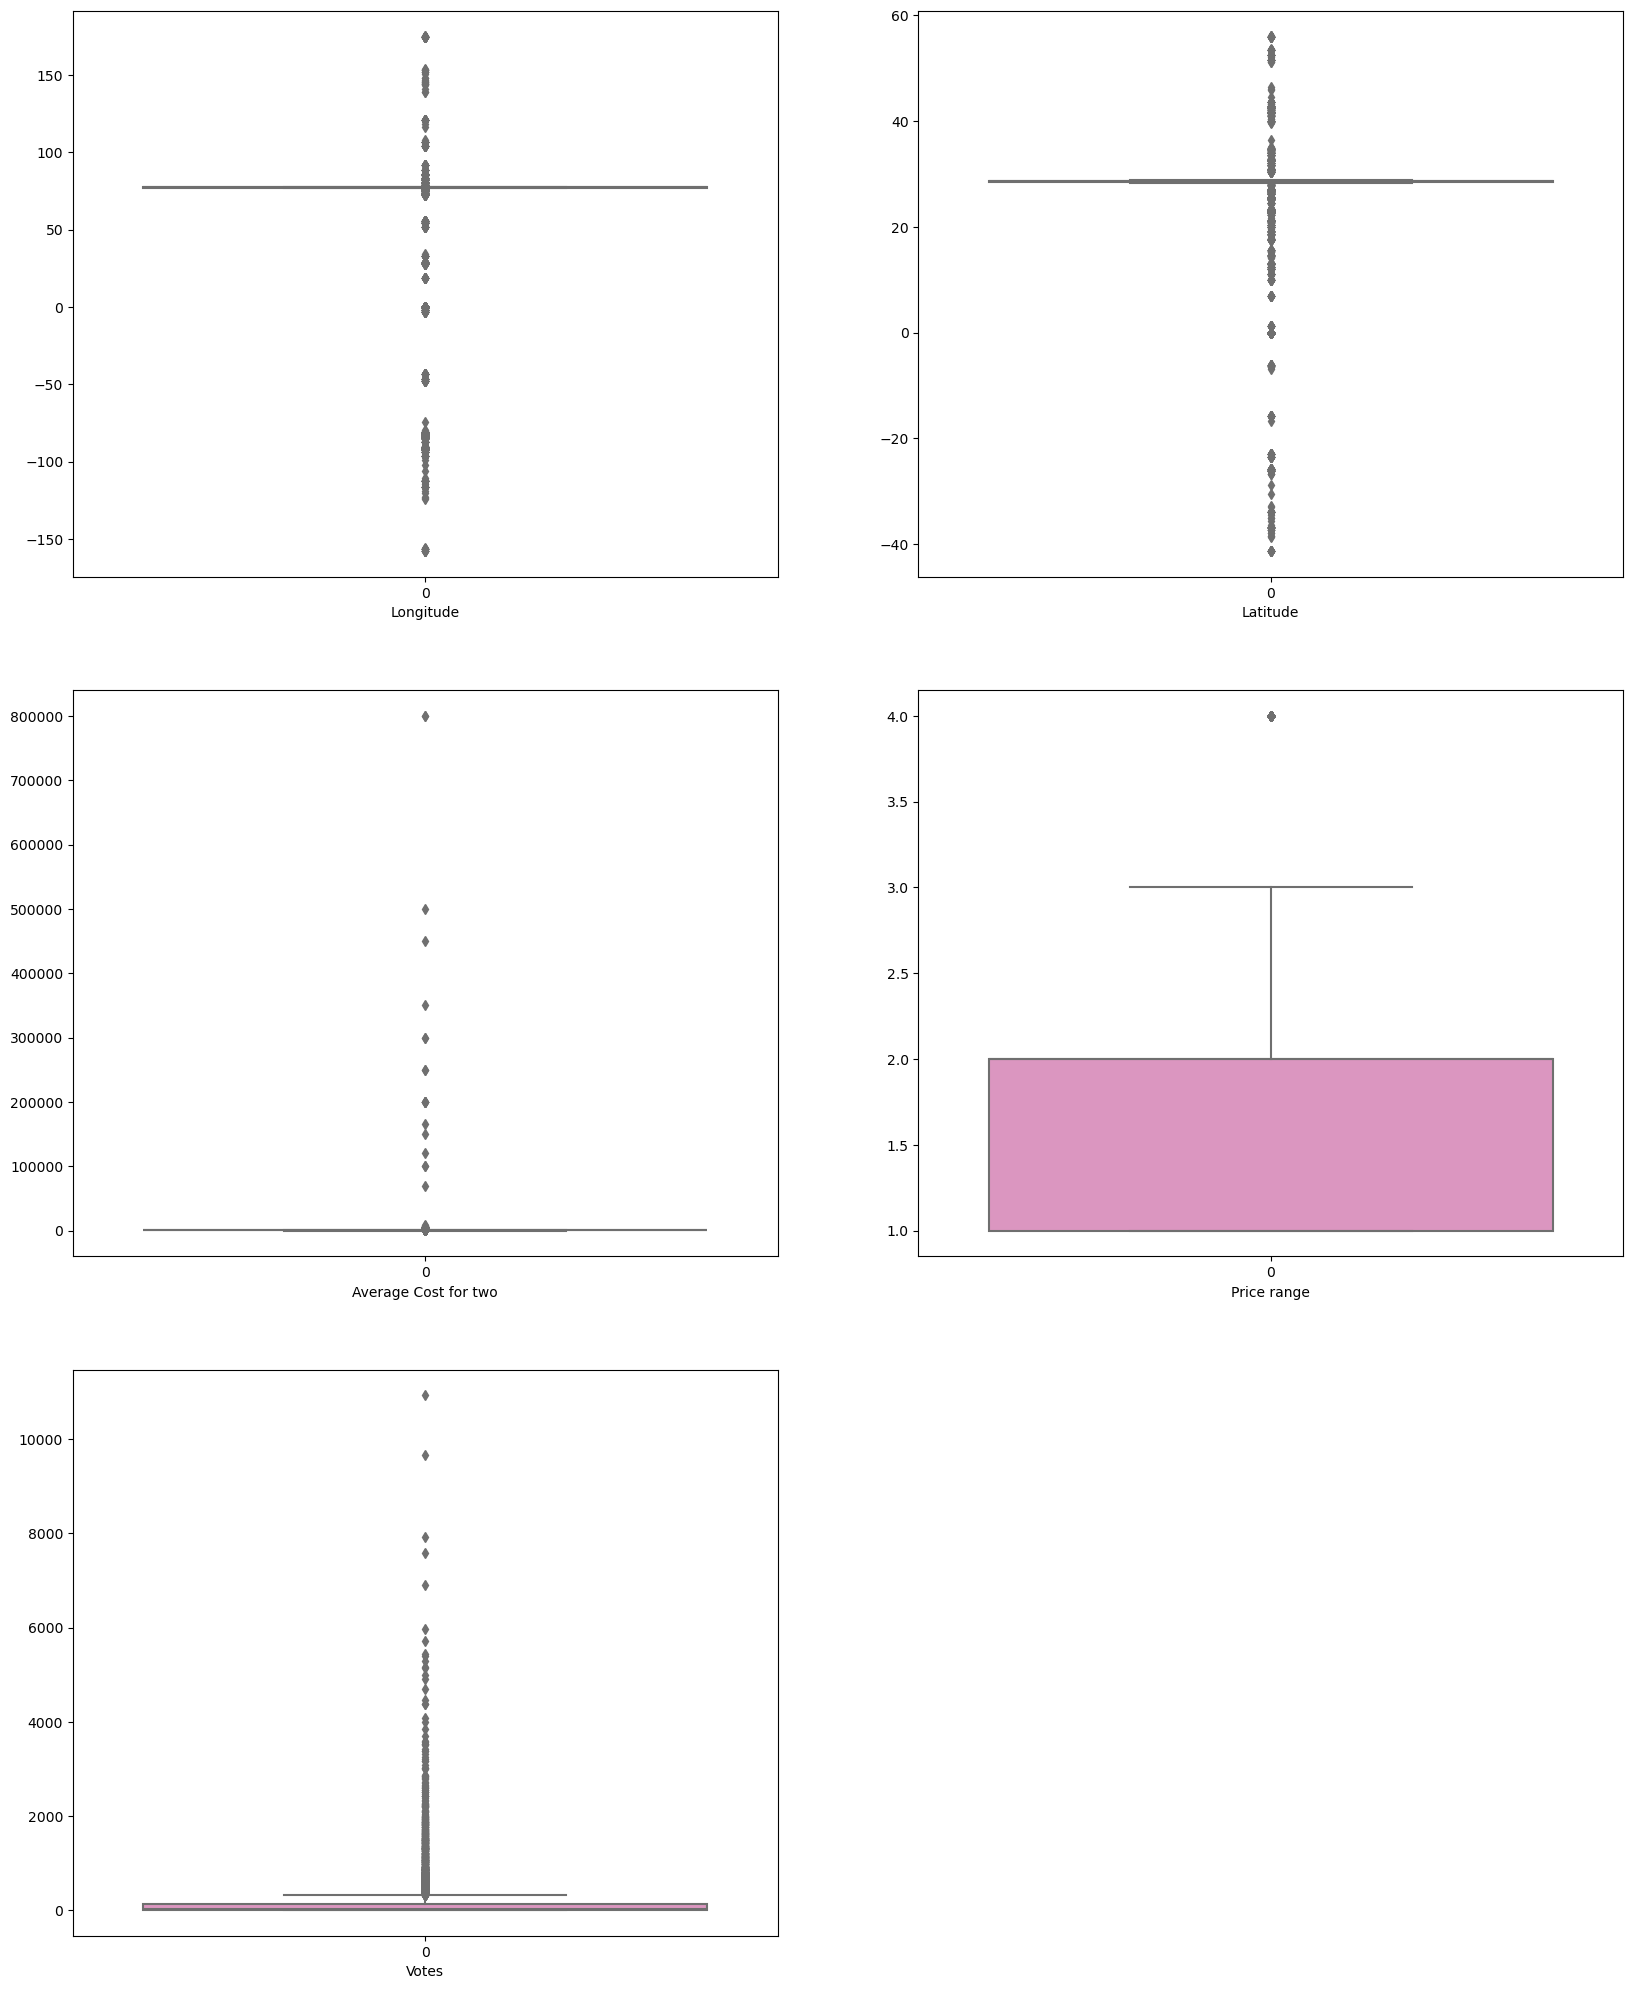

In [38]:
#Let's check data distribution and outliers using boxplot
#Outliers will be dealt with later
plt.figure(figsize=(20,25))
p=1
for column in numerical:
    if p<=5:
        plt.subplot(3,2,p)
        sns.boxplot(df[column], palette ="Set2_r")
        plt.xlabel(column)
        
    p+=1
    
plt.show()

# Univariate analysis for numerical columns

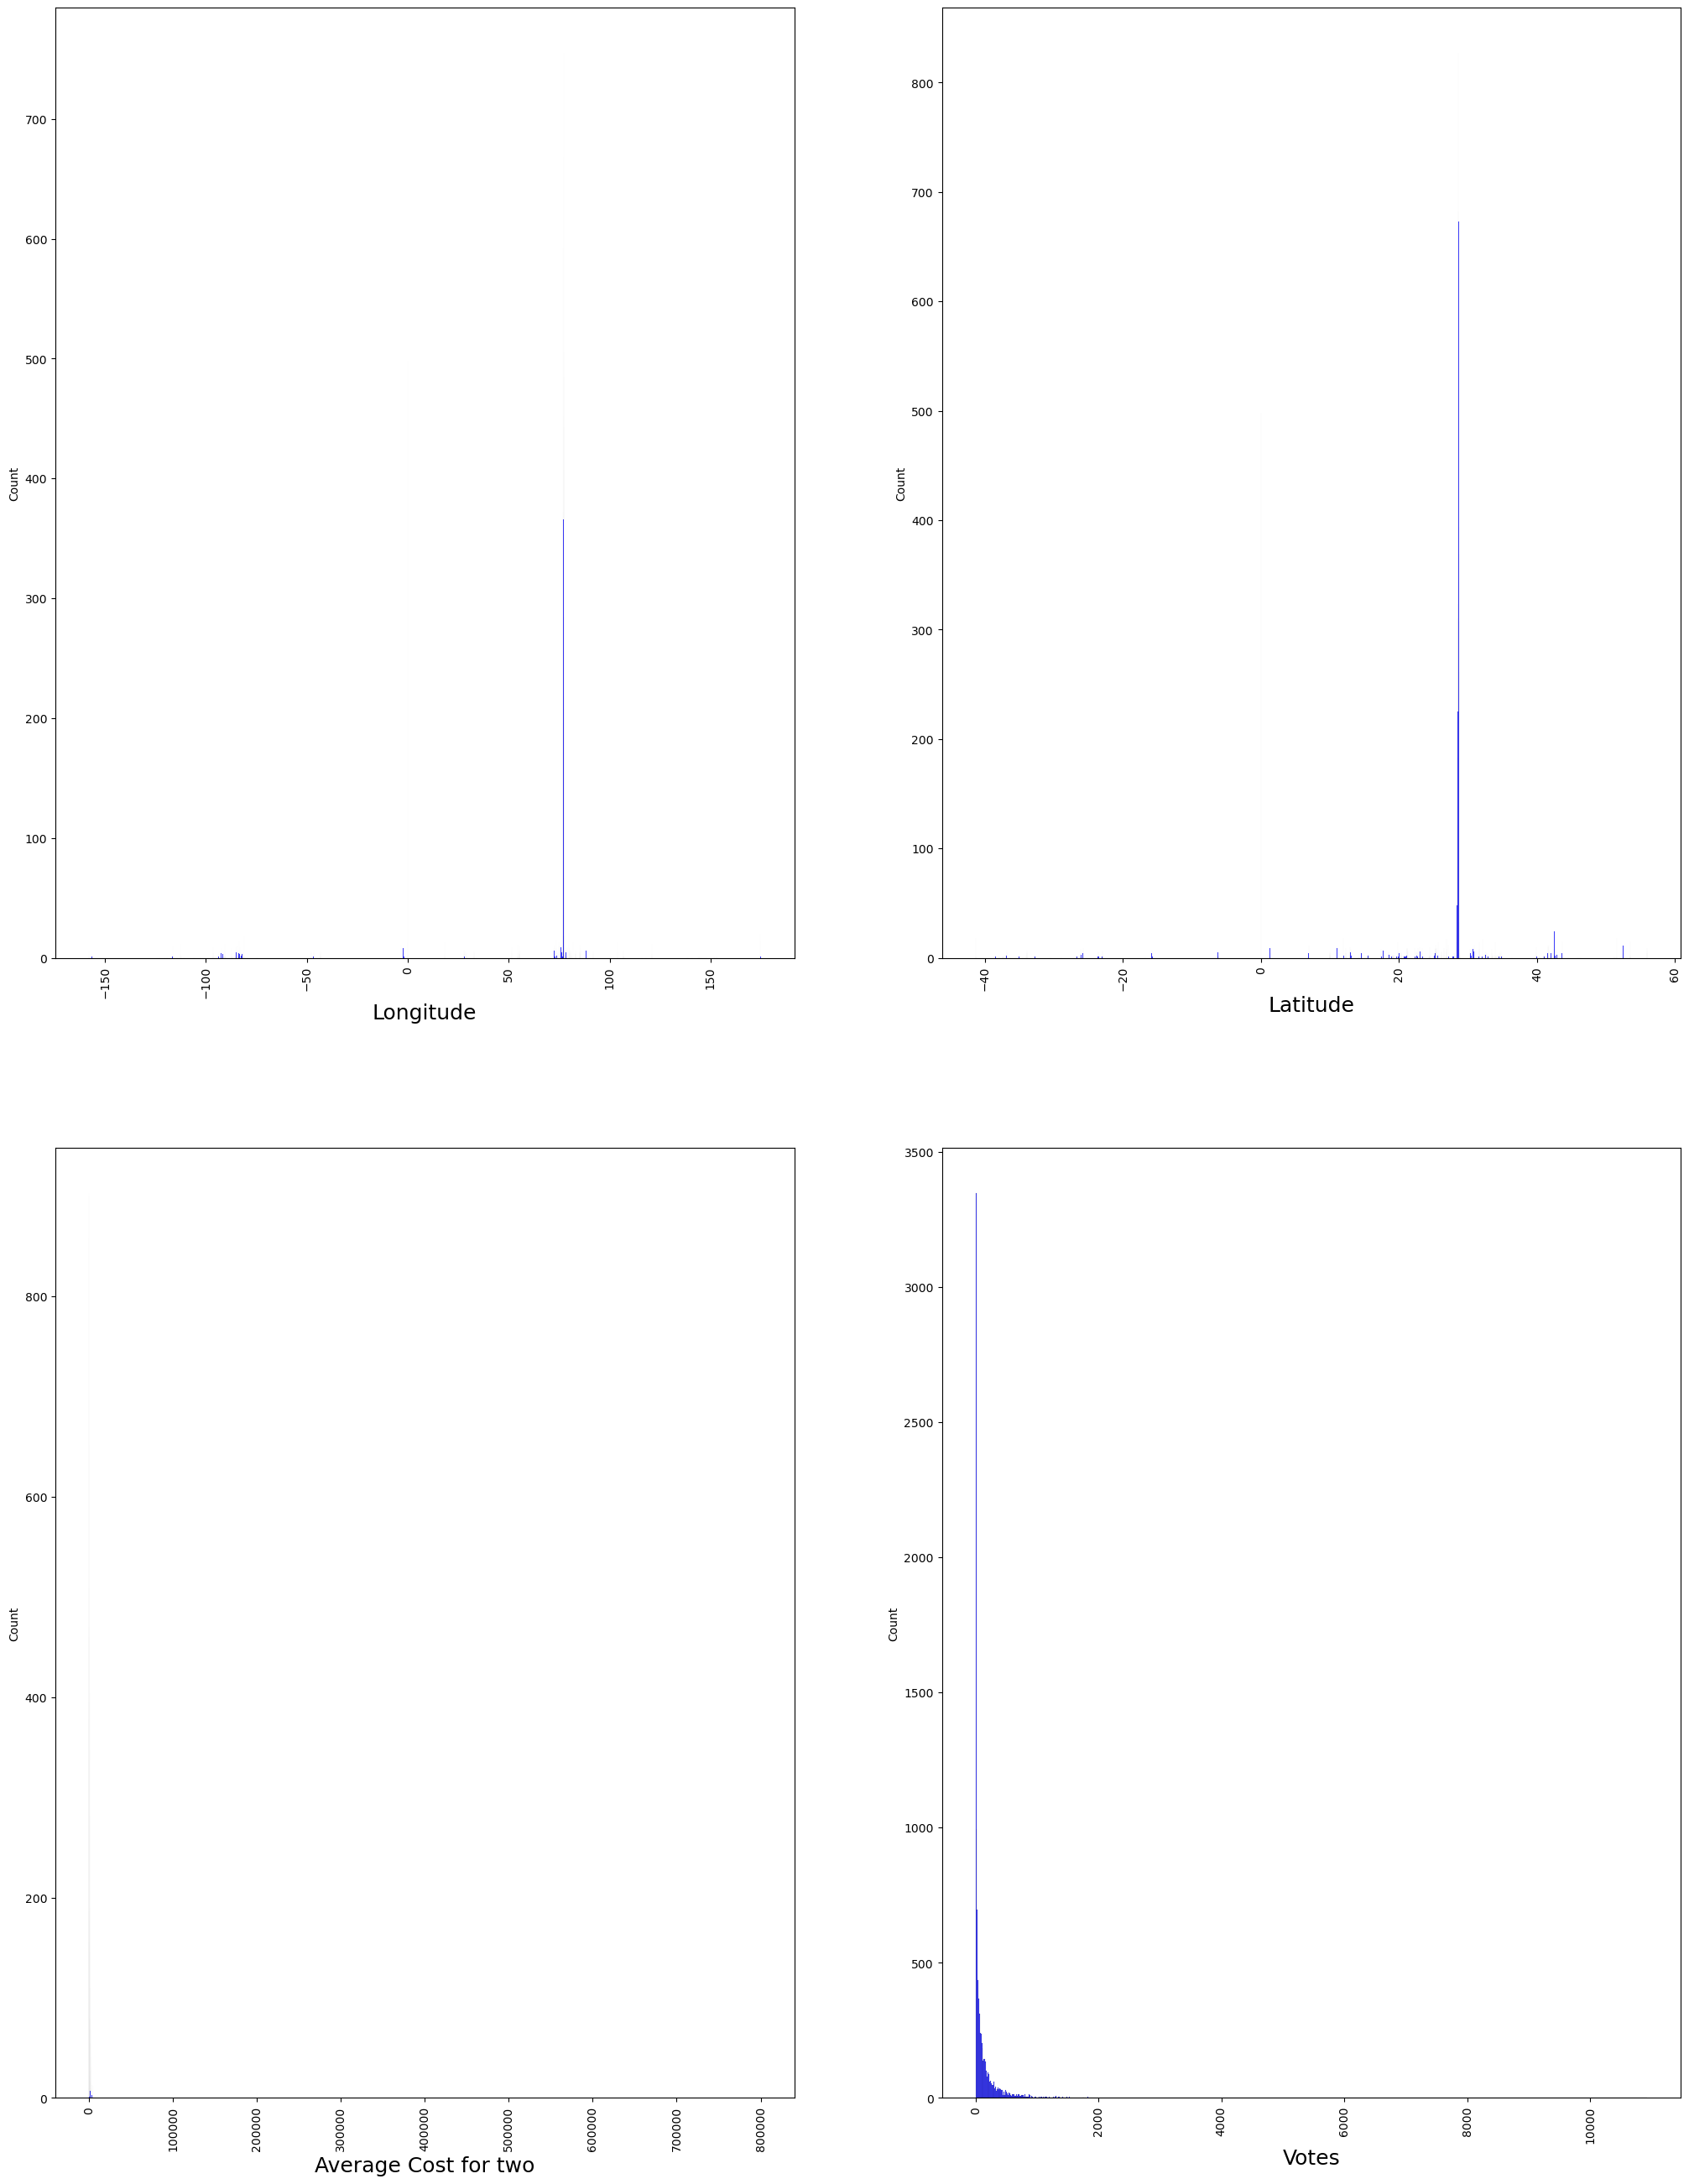

In [94]:

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.histplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=18)
        plt.xticks(rotation=90, fontsize=10)
        
    plotnumber +=1
plt.show()

# Univariate analysis for categorical columns

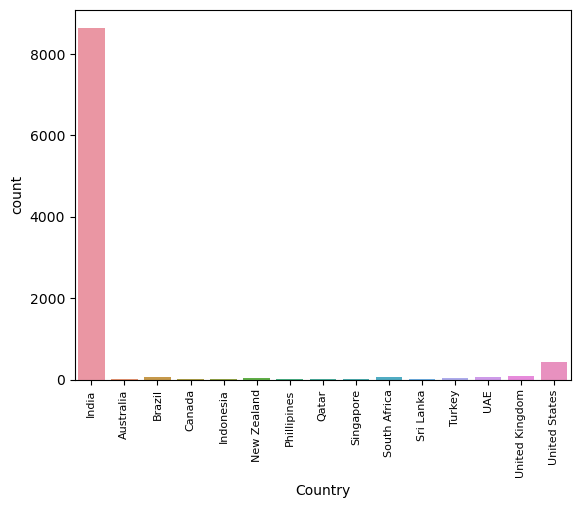

In [95]:
ax=sns.countplot(x='Country',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

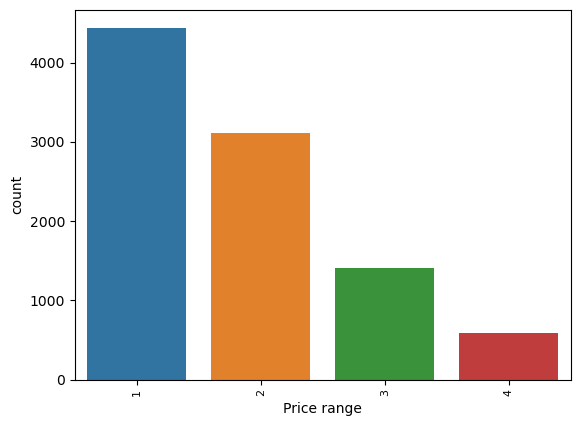

In [96]:
ax=sns.countplot(x='Price range',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

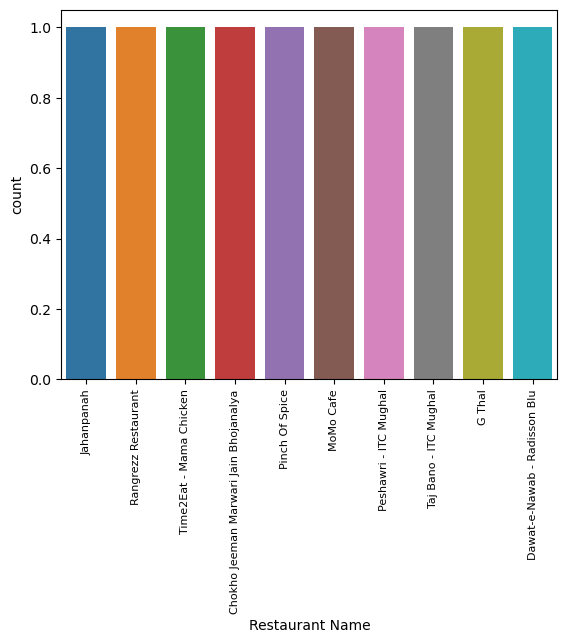

In [98]:
ax=sns.countplot(x='Restaurant Name',data=df[:10])
plt.xticks(rotation=90, fontsize=8)
plt.show()

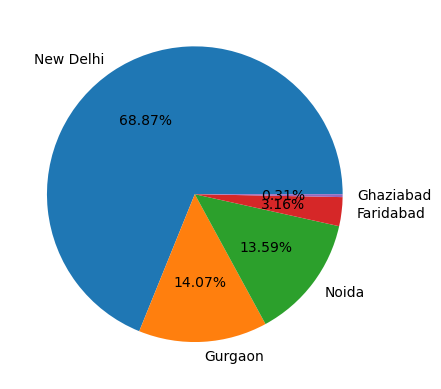

In [101]:
city = df.City.value_counts().values
city_labels = df.City.value_counts().index
plt.pie(city[:5],labels=city_labels[:5],autopct='%1.2f%%')
plt.show()
#68.87% of zomato are based in New Delhi

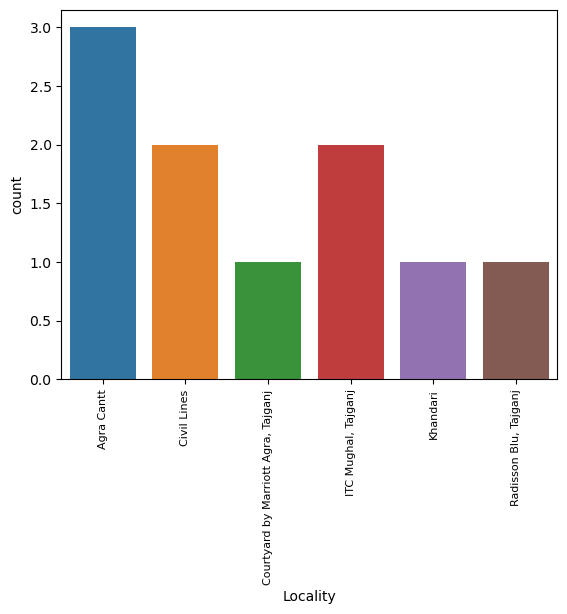

In [78]:
ax=sns.countplot(x='Locality',data=df[:10])
plt.xticks(rotation=90, fontsize=8)
plt.show()

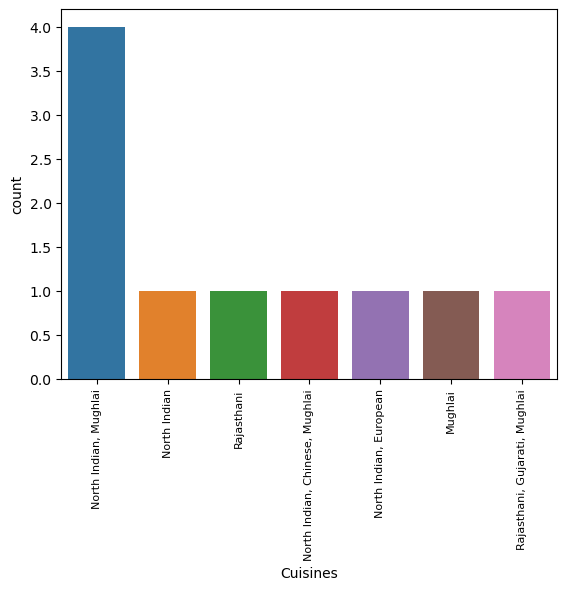

In [79]:
ax=sns.countplot(x='Cuisines',data=df[:10])
plt.xticks(rotation=90, fontsize=8)
plt.show()

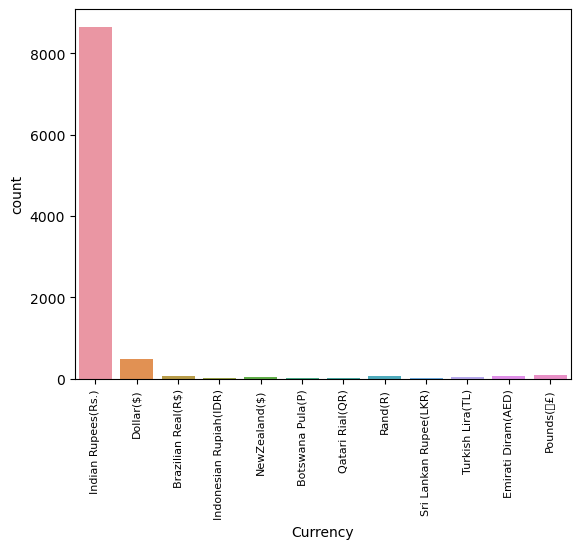

In [45]:
ax=sns.countplot(x='Currency',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

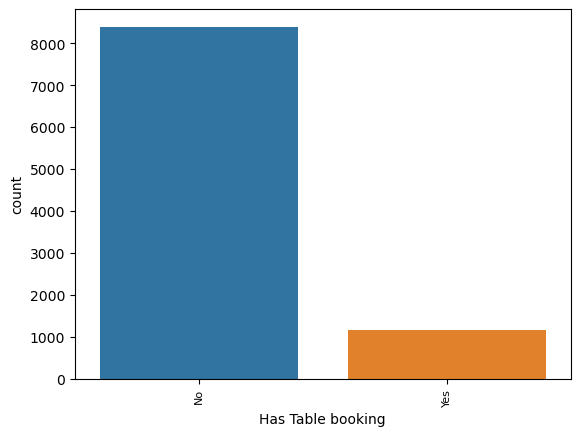

In [46]:
ax=sns.countplot(x='Has Table booking',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

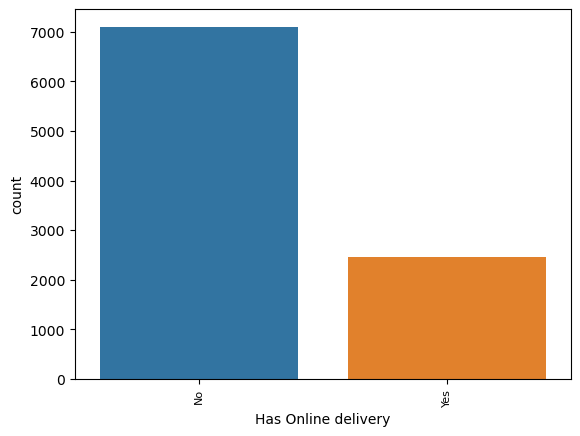

In [47]:
ax=sns.countplot(x='Has Online delivery',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

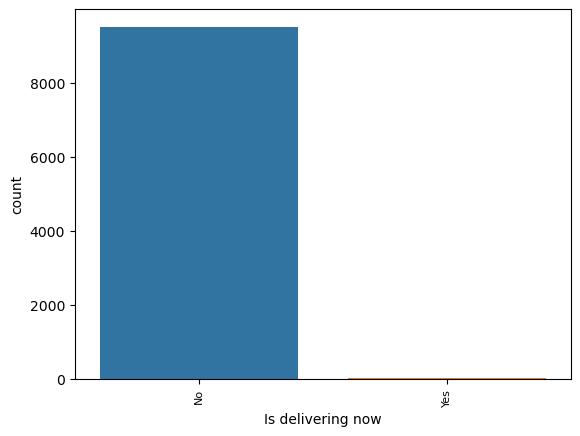

In [48]:
ax=sns.countplot(x='Is delivering now',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

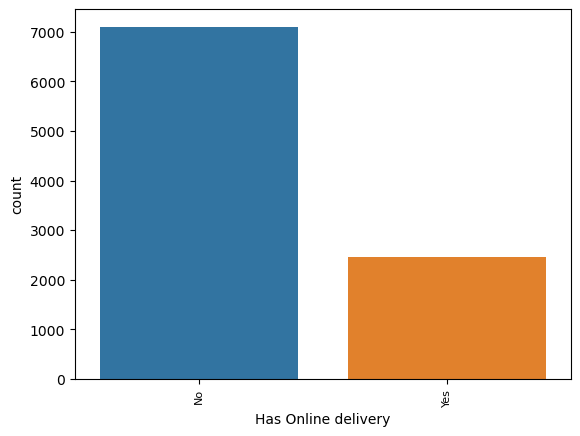

In [49]:
ax=sns.countplot(x='Has Online delivery',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

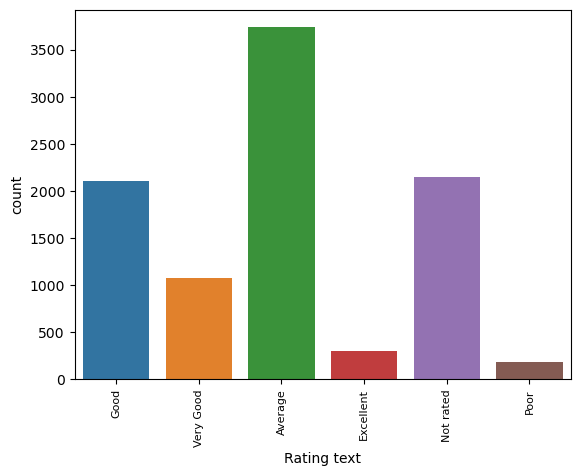

In [50]:
ax=sns.countplot(x='Rating text',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

# Bivariate Analysis-Categorical column V Target Variable(Average Cost for two)

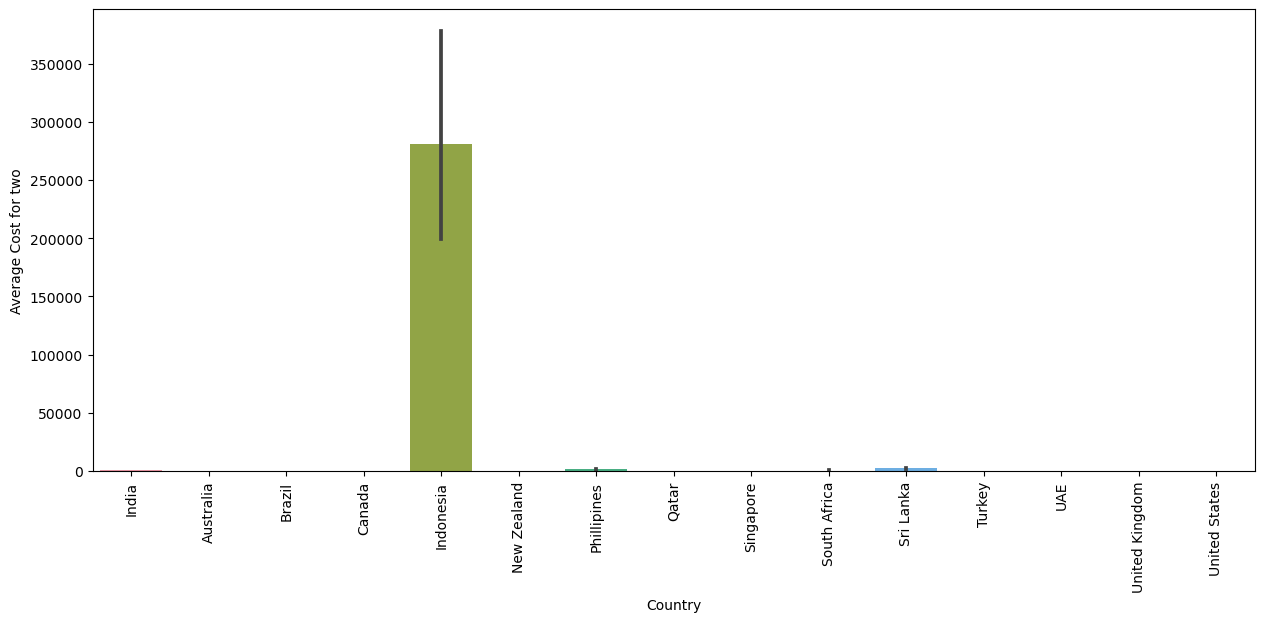

In [58]:
plt.figure(figsize=(15,6))
sns.barplot(x="Country",y="Average Cost for two",data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()
#Indonesia has the highest average cost for two

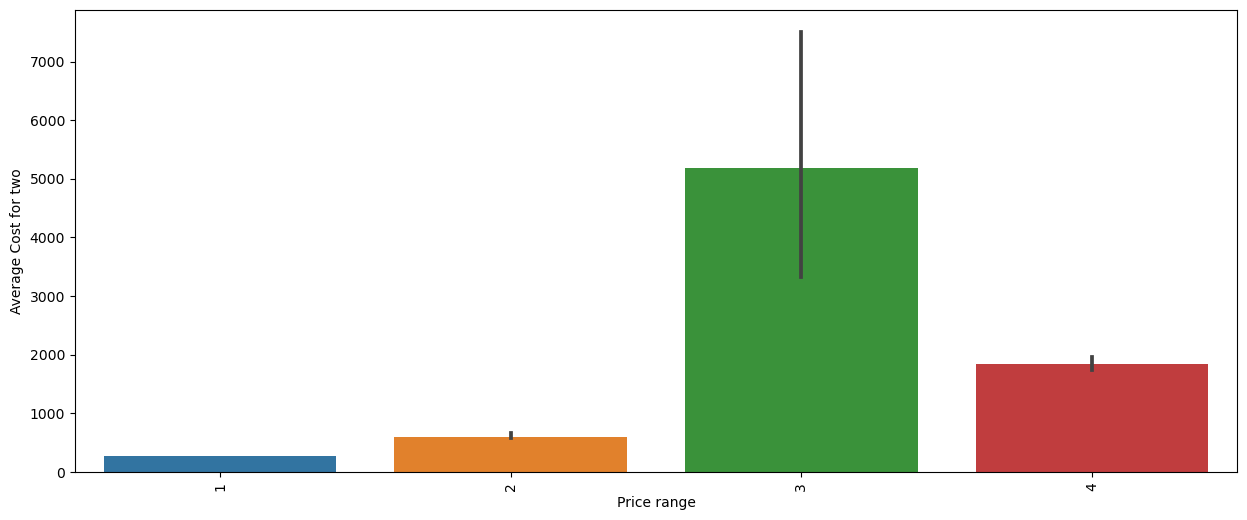

In [103]:
plt.figure(figsize=(15,6))
sns.barplot(x="Price range",y="Average Cost for two",data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()
#price range 3 has the highest average cost of two

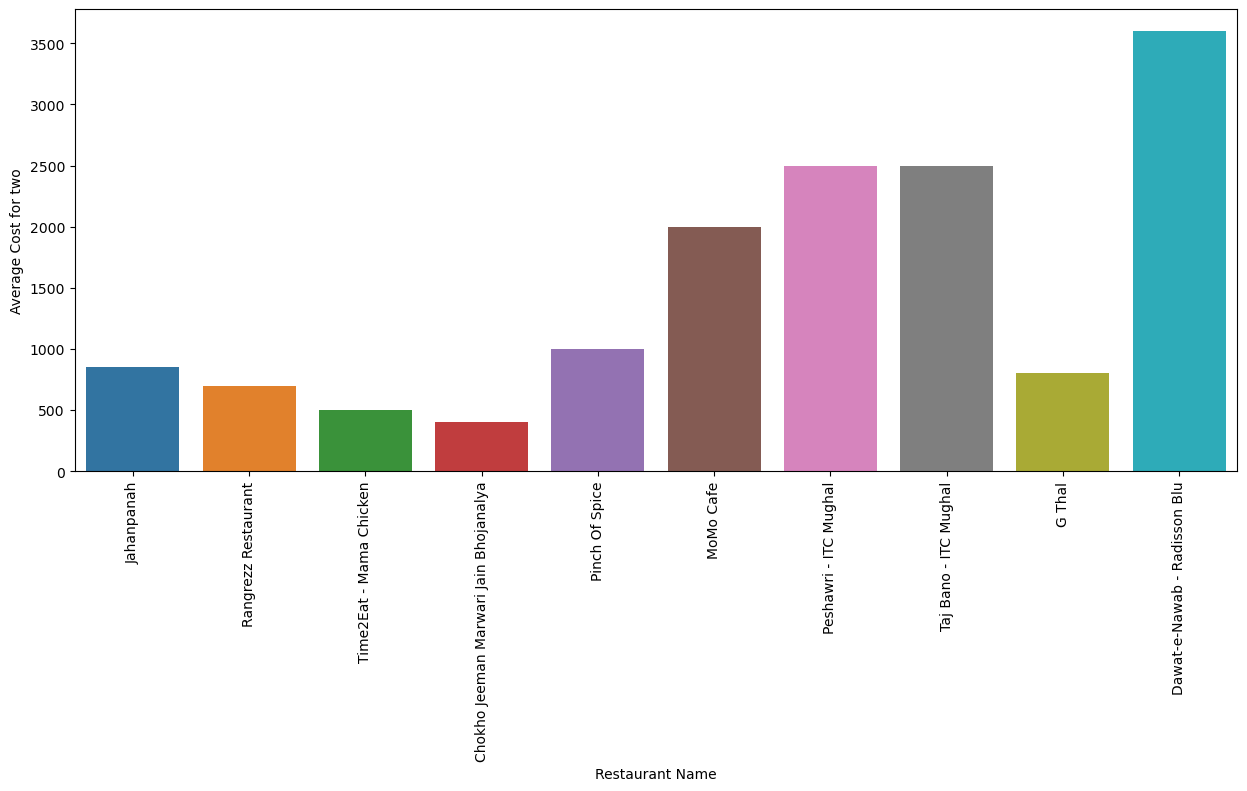

In [80]:
plt.figure(figsize=(15,6))
sns.barplot(x="Restaurant Name",y="Average Cost for two",data=df[:10])
plt.xticks(rotation=90, fontsize=10)
plt.show()
#Out of 10 restaurants,Dawat e Nawab-Radisson Blu has the highest average cost for two

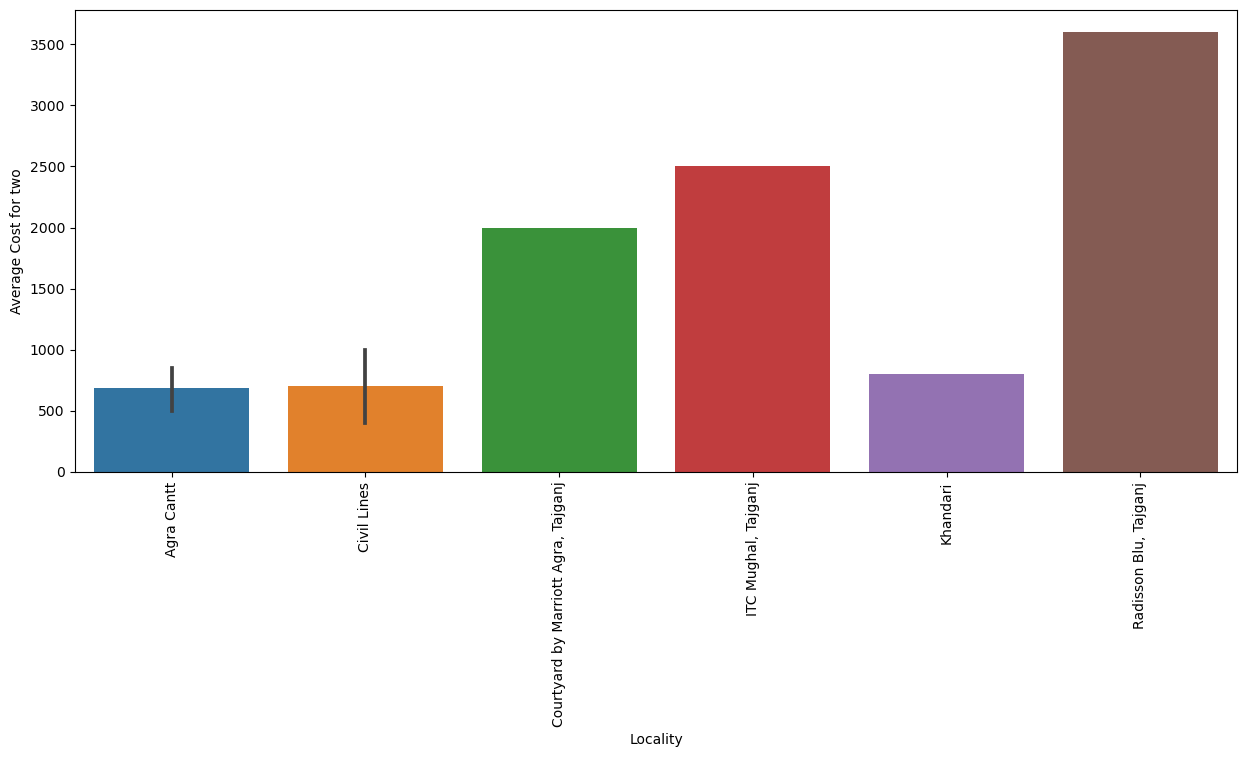

In [85]:
plt.figure(figsize=(15,6))
sns.barplot(x="Locality",y="Average Cost for two",data=df[:10])
plt.xticks(rotation=90, fontsize=10)
plt.show()
#Out of 10 localities,Radisson Blu Tajganj has the highest average cost for two

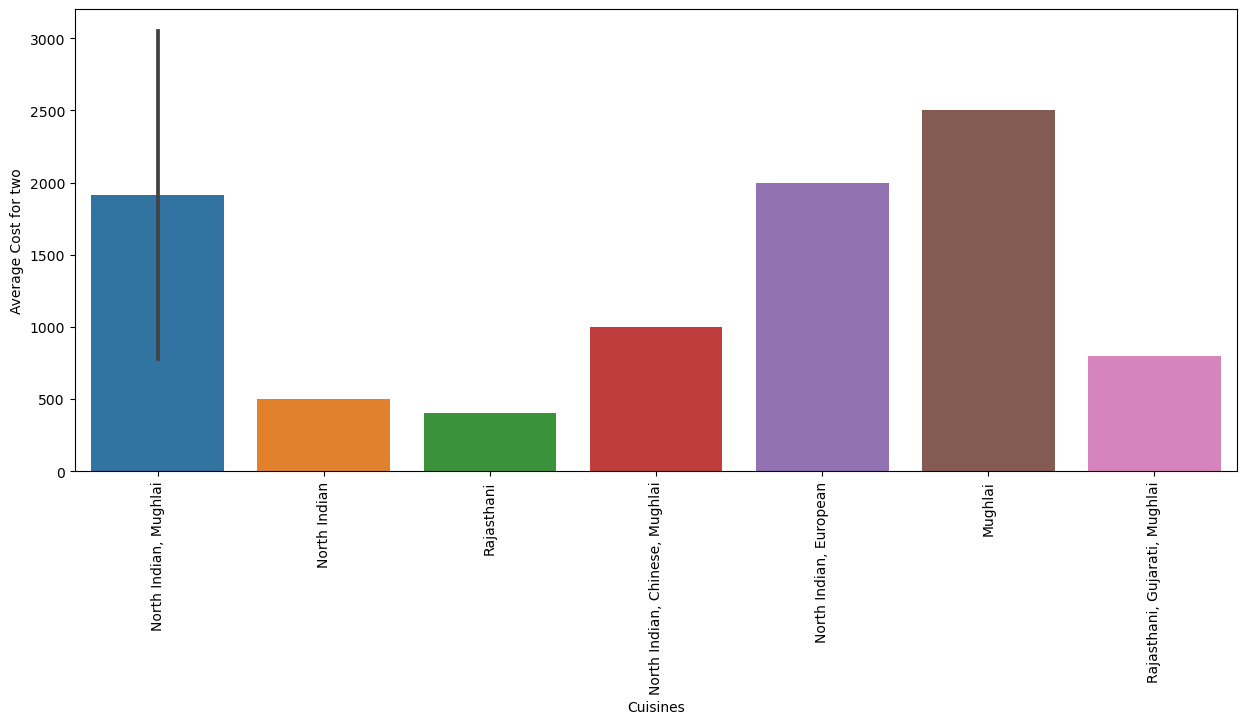

In [86]:
plt.figure(figsize=(15,6))
sns.barplot(x="Cuisines",y="Average Cost for two",data=df[:10])
plt.xticks(rotation=90, fontsize=10)
plt.show()
#Out of top 10 cuisines,North indian cuisine is the most common dish also with the highest average cost for two

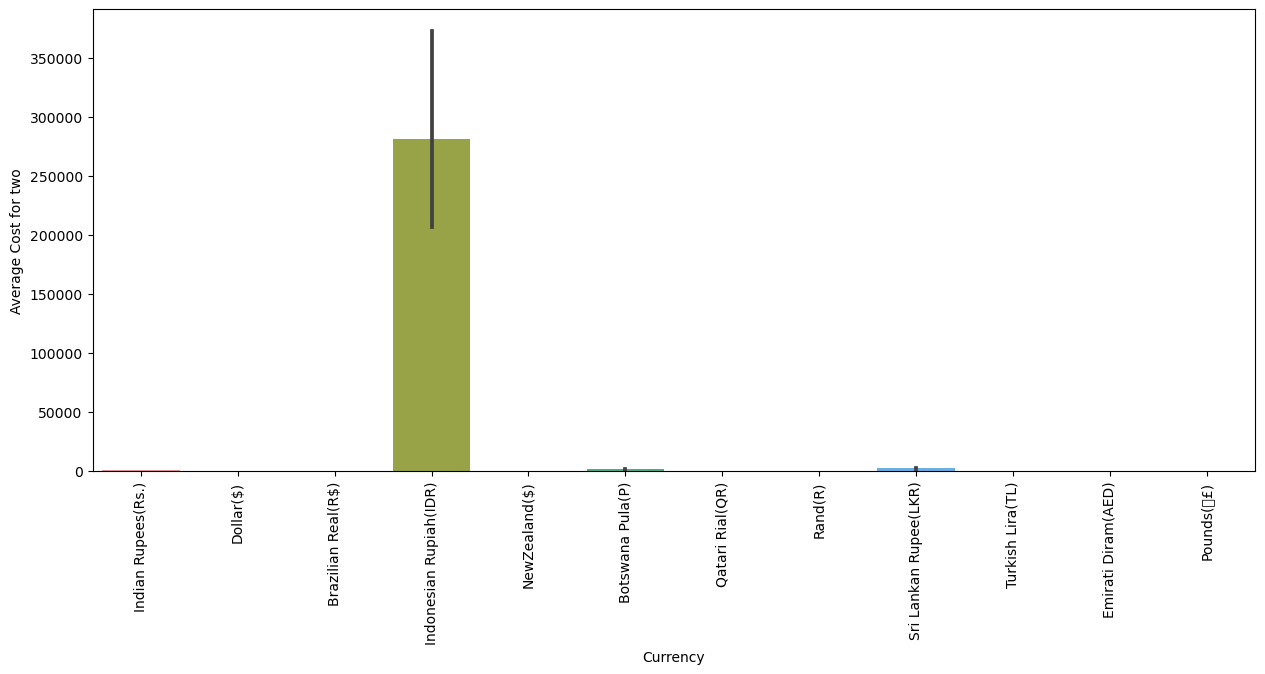

In [63]:
plt.figure(figsize=(15,6))
sns.barplot(x="Currency",y="Average Cost for two",data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()
#Indonesian Rupiah is the most common currency agauin wuth the highest average cost for two

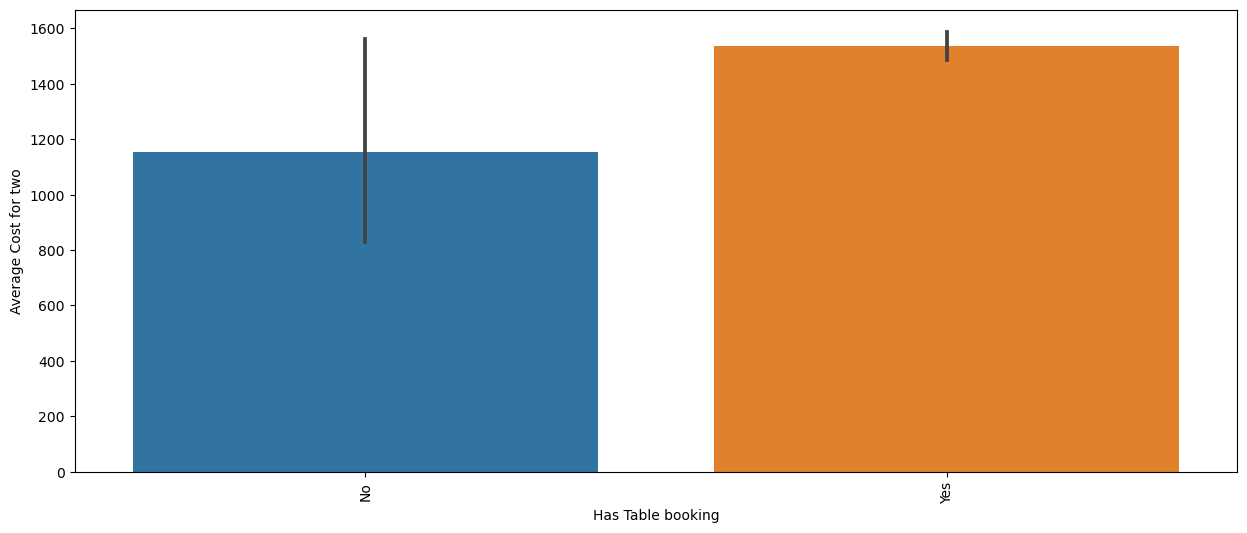

In [64]:
plt.figure(figsize=(15,6))
sns.barplot(x="Has Table booking",y="Average Cost for two",data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()
#where there is availability of table booking,the average cost for two is higher

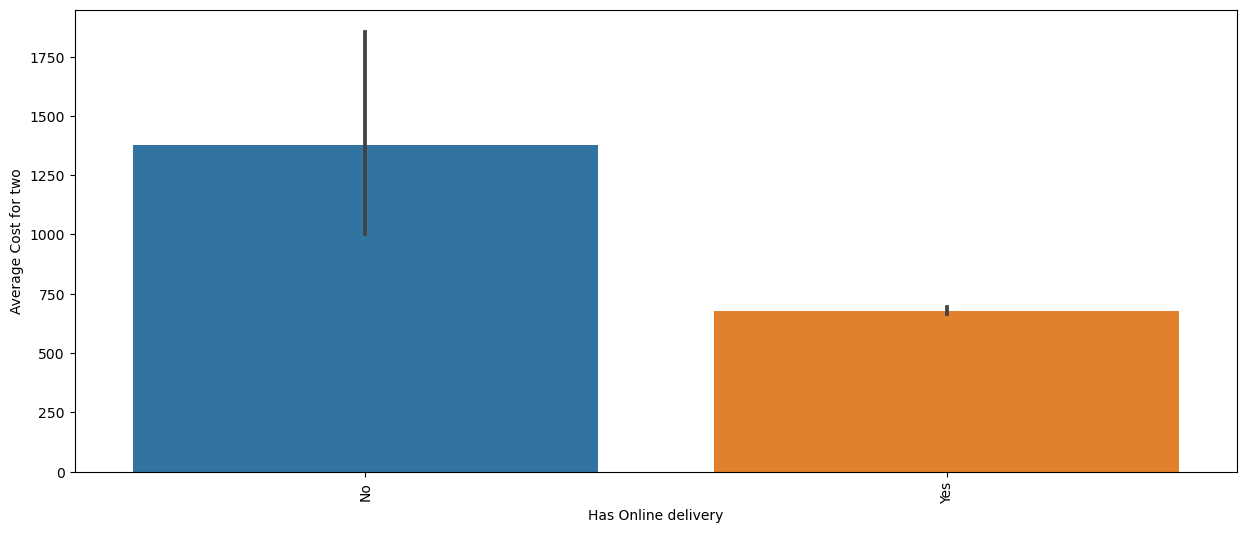

In [65]:
plt.figure(figsize=(15,6))
sns.barplot(x="Has Online delivery",y="Average Cost for two",data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()
#where there is no online delivery,average cost for two tends to be higher

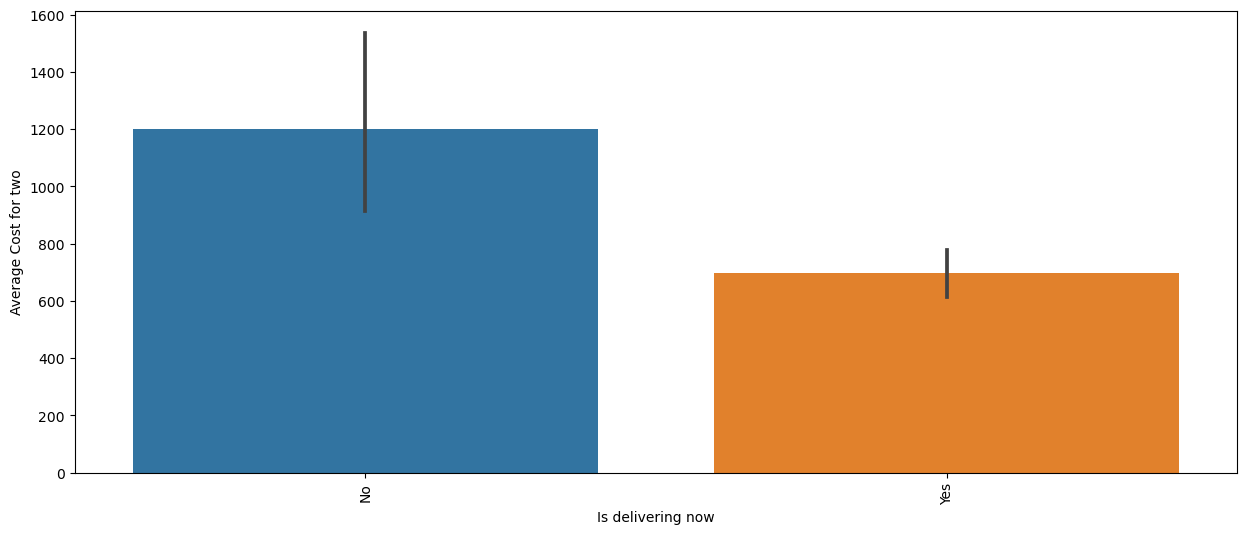

In [66]:
plt.figure(figsize=(15,6))
sns.barplot(x="Is delivering now",y="Average Cost for two",data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()
#where there is no delivery now facility,average cost for two tends to be higher

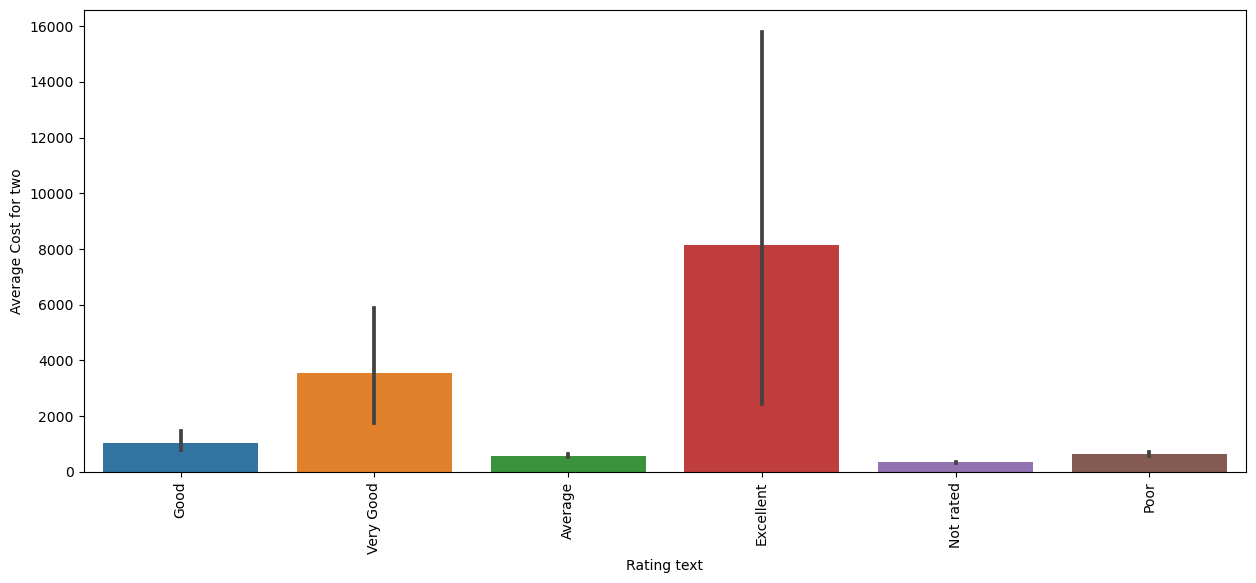

In [67]:
plt.figure(figsize=(15,6))
sns.barplot(x="Rating text",y="Average Cost for two",data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()
#Restaurants rated Excellent have the highest average 

# Bivariate analysis of Price range versus categorical columns

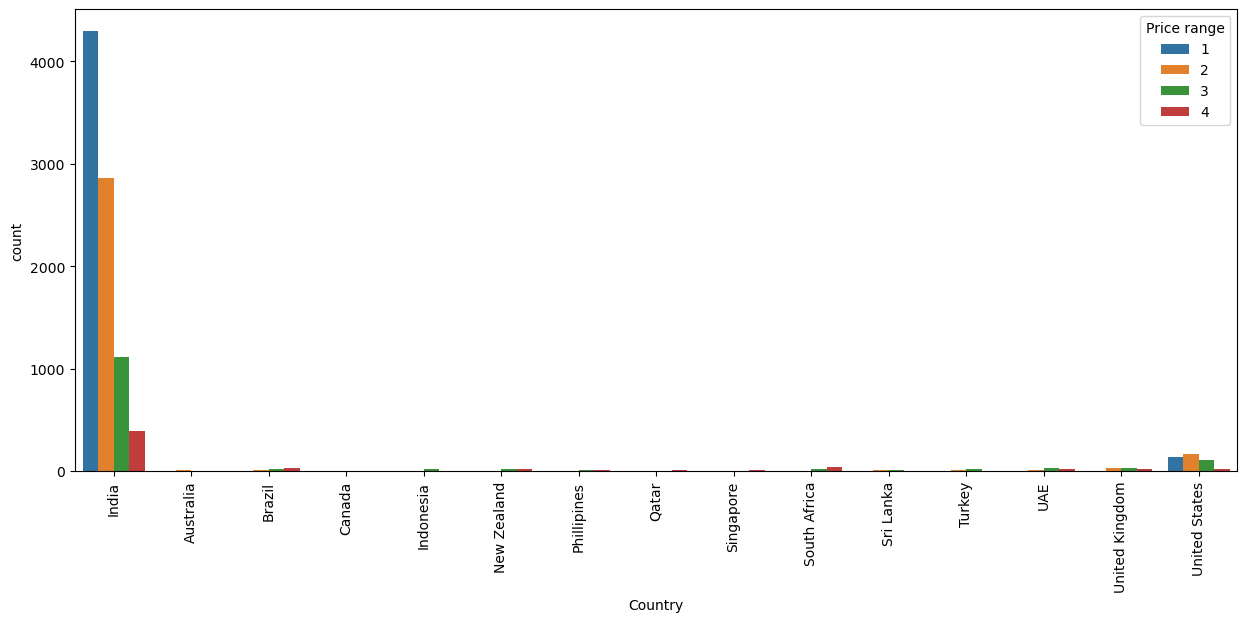

In [106]:
plt.figure(figsize=(15,6))
sns.countplot(x="Country",hue='Price range',data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()
#the most common price range in India is 1

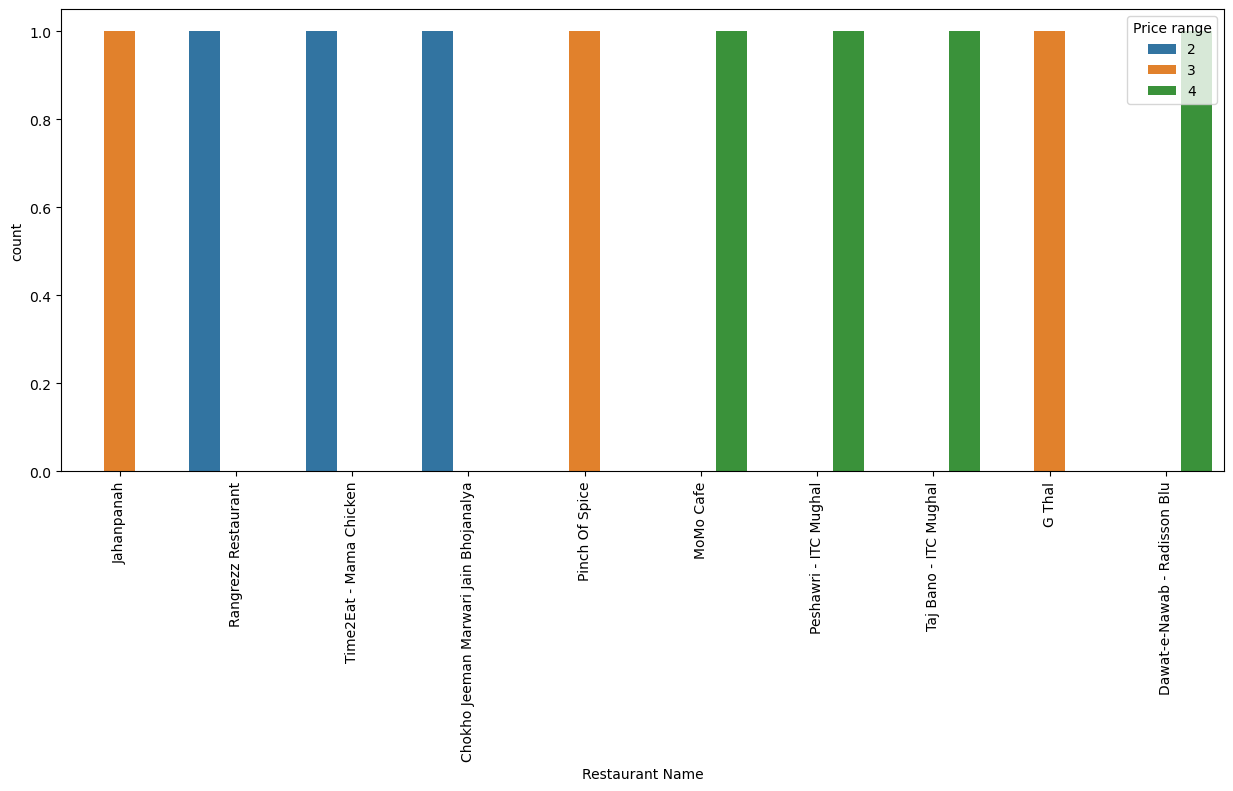

In [113]:
plt.figure(figsize=(15,6))
sns.countplot(x="Restaurant Name",hue='Price range',data=df[:10])
plt.xticks(rotation=90, fontsize=10)
plt.show()

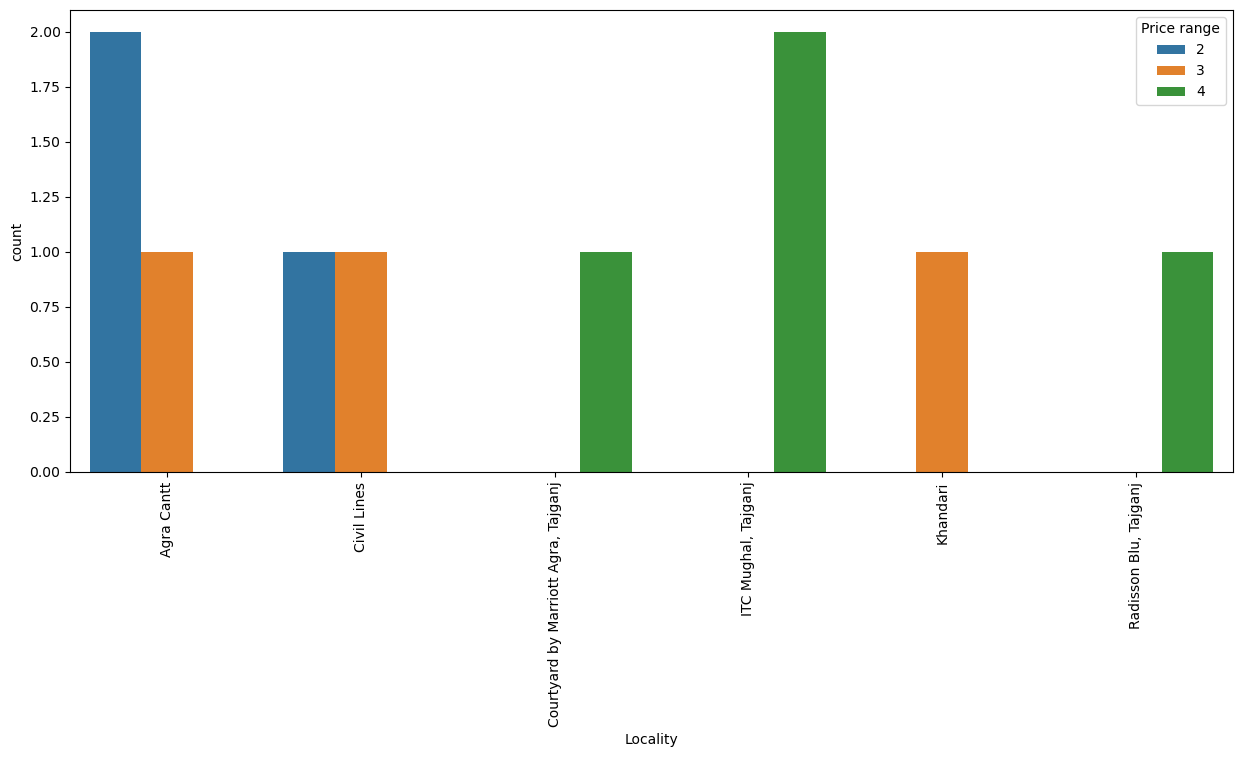

In [121]:
plt.figure(figsize=(15,6))
sns.countplot(x="Locality",hue='Price range',data=df[:10])
plt.xticks(rotation=90, fontsize=10)
plt.show()

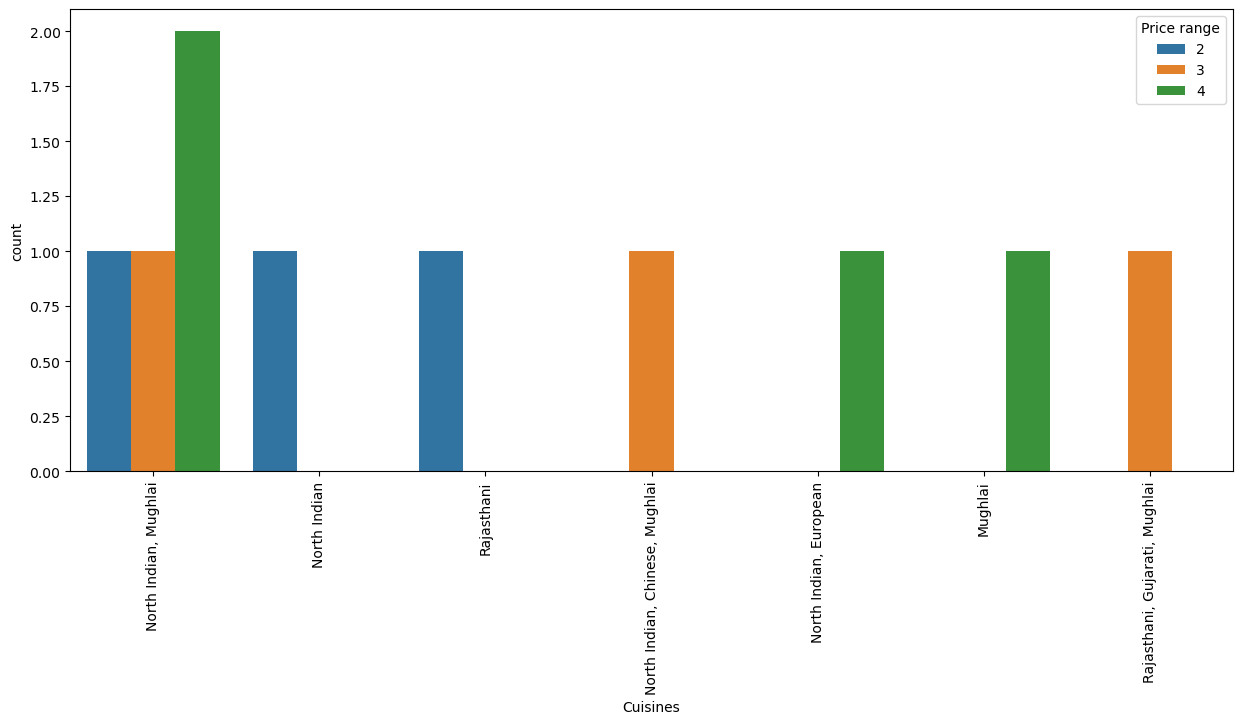

In [122]:
plt.figure(figsize=(15,6))
sns.countplot(x="Cuisines",hue='Price range',data=df[:10])
plt.xticks(rotation=90, fontsize=10)
plt.show()

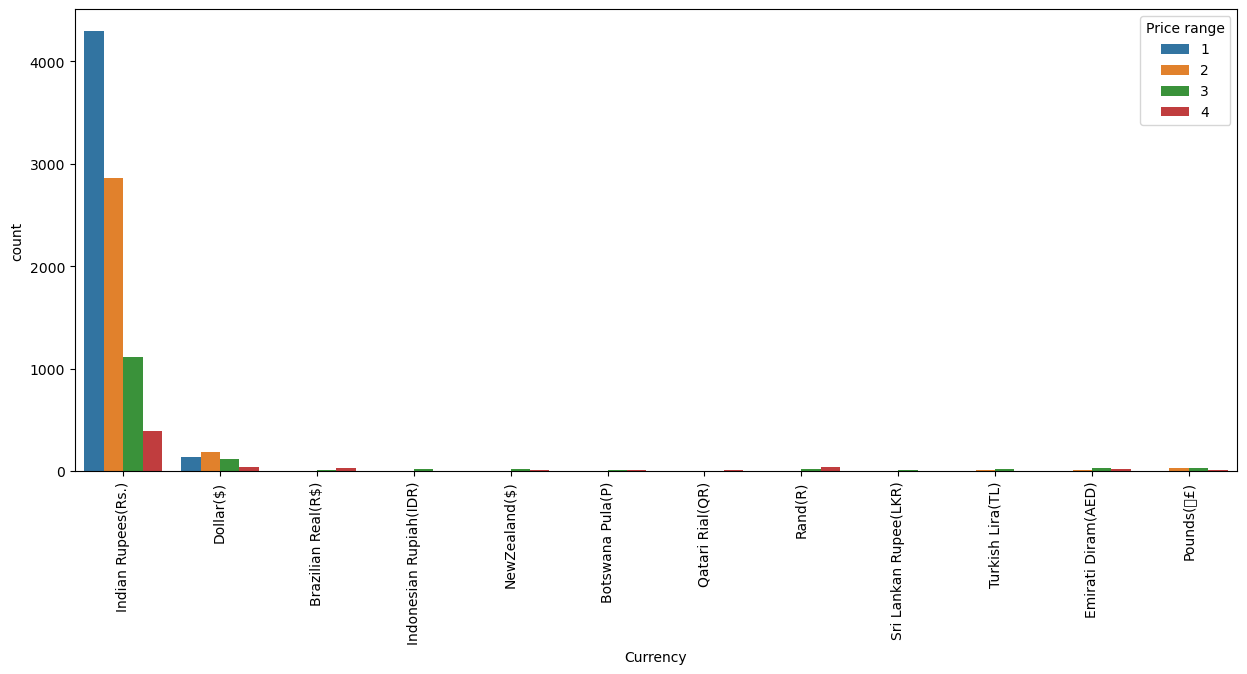

In [123]:
plt.figure(figsize=(15,6))
sns.countplot(x="Currency",hue='Price range',data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()

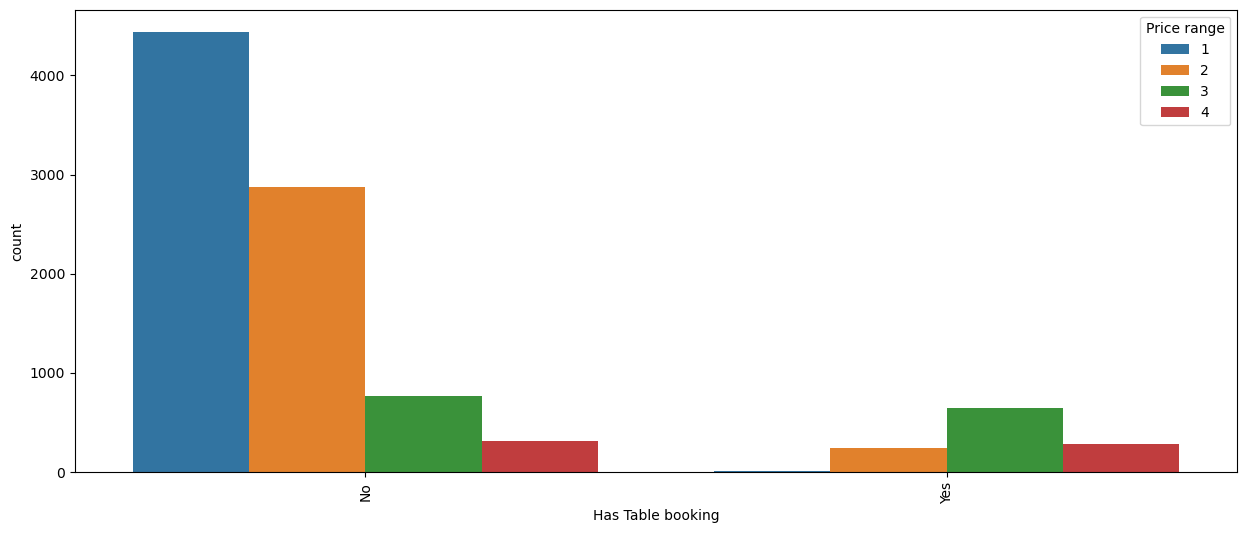

In [124]:
plt.figure(figsize=(15,6))
sns.countplot(x="Has Table booking",hue='Price range',data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()

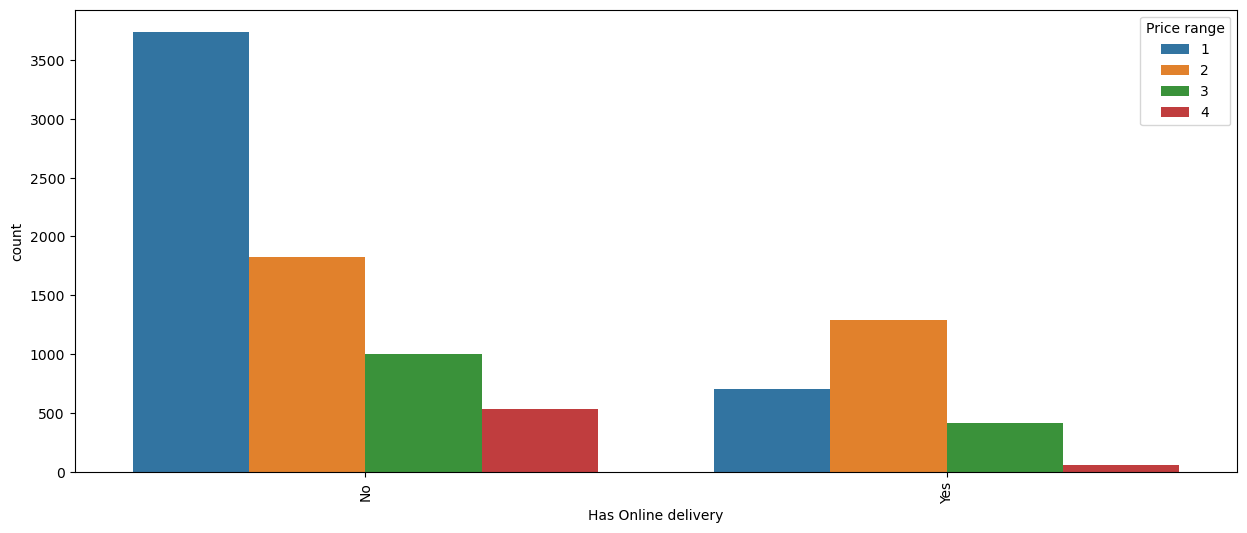

In [125]:
plt.figure(figsize=(15,6))
sns.countplot(x="Has Online delivery",hue='Price range',data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()

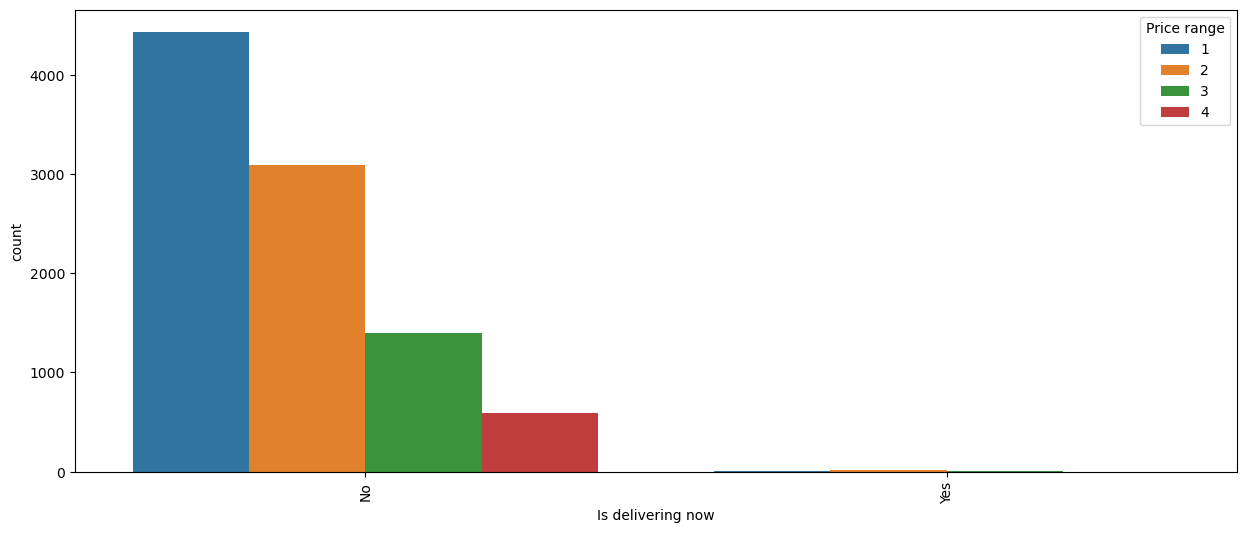

In [126]:
plt.figure(figsize=(15,6))
sns.countplot(x="Is delivering now",hue='Price range',data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()

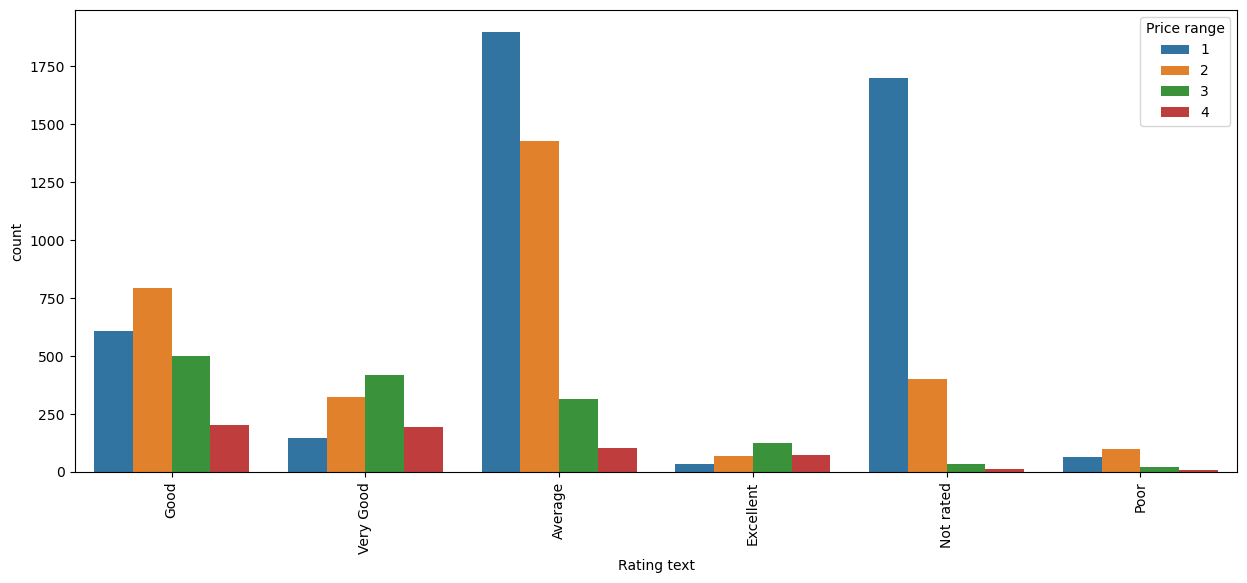

In [127]:
plt.figure(figsize=(15,6))
sns.countplot(x="Rating text",hue='Price range',data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()

# Bivariate analysis of Average Cost for two versus numerical columns

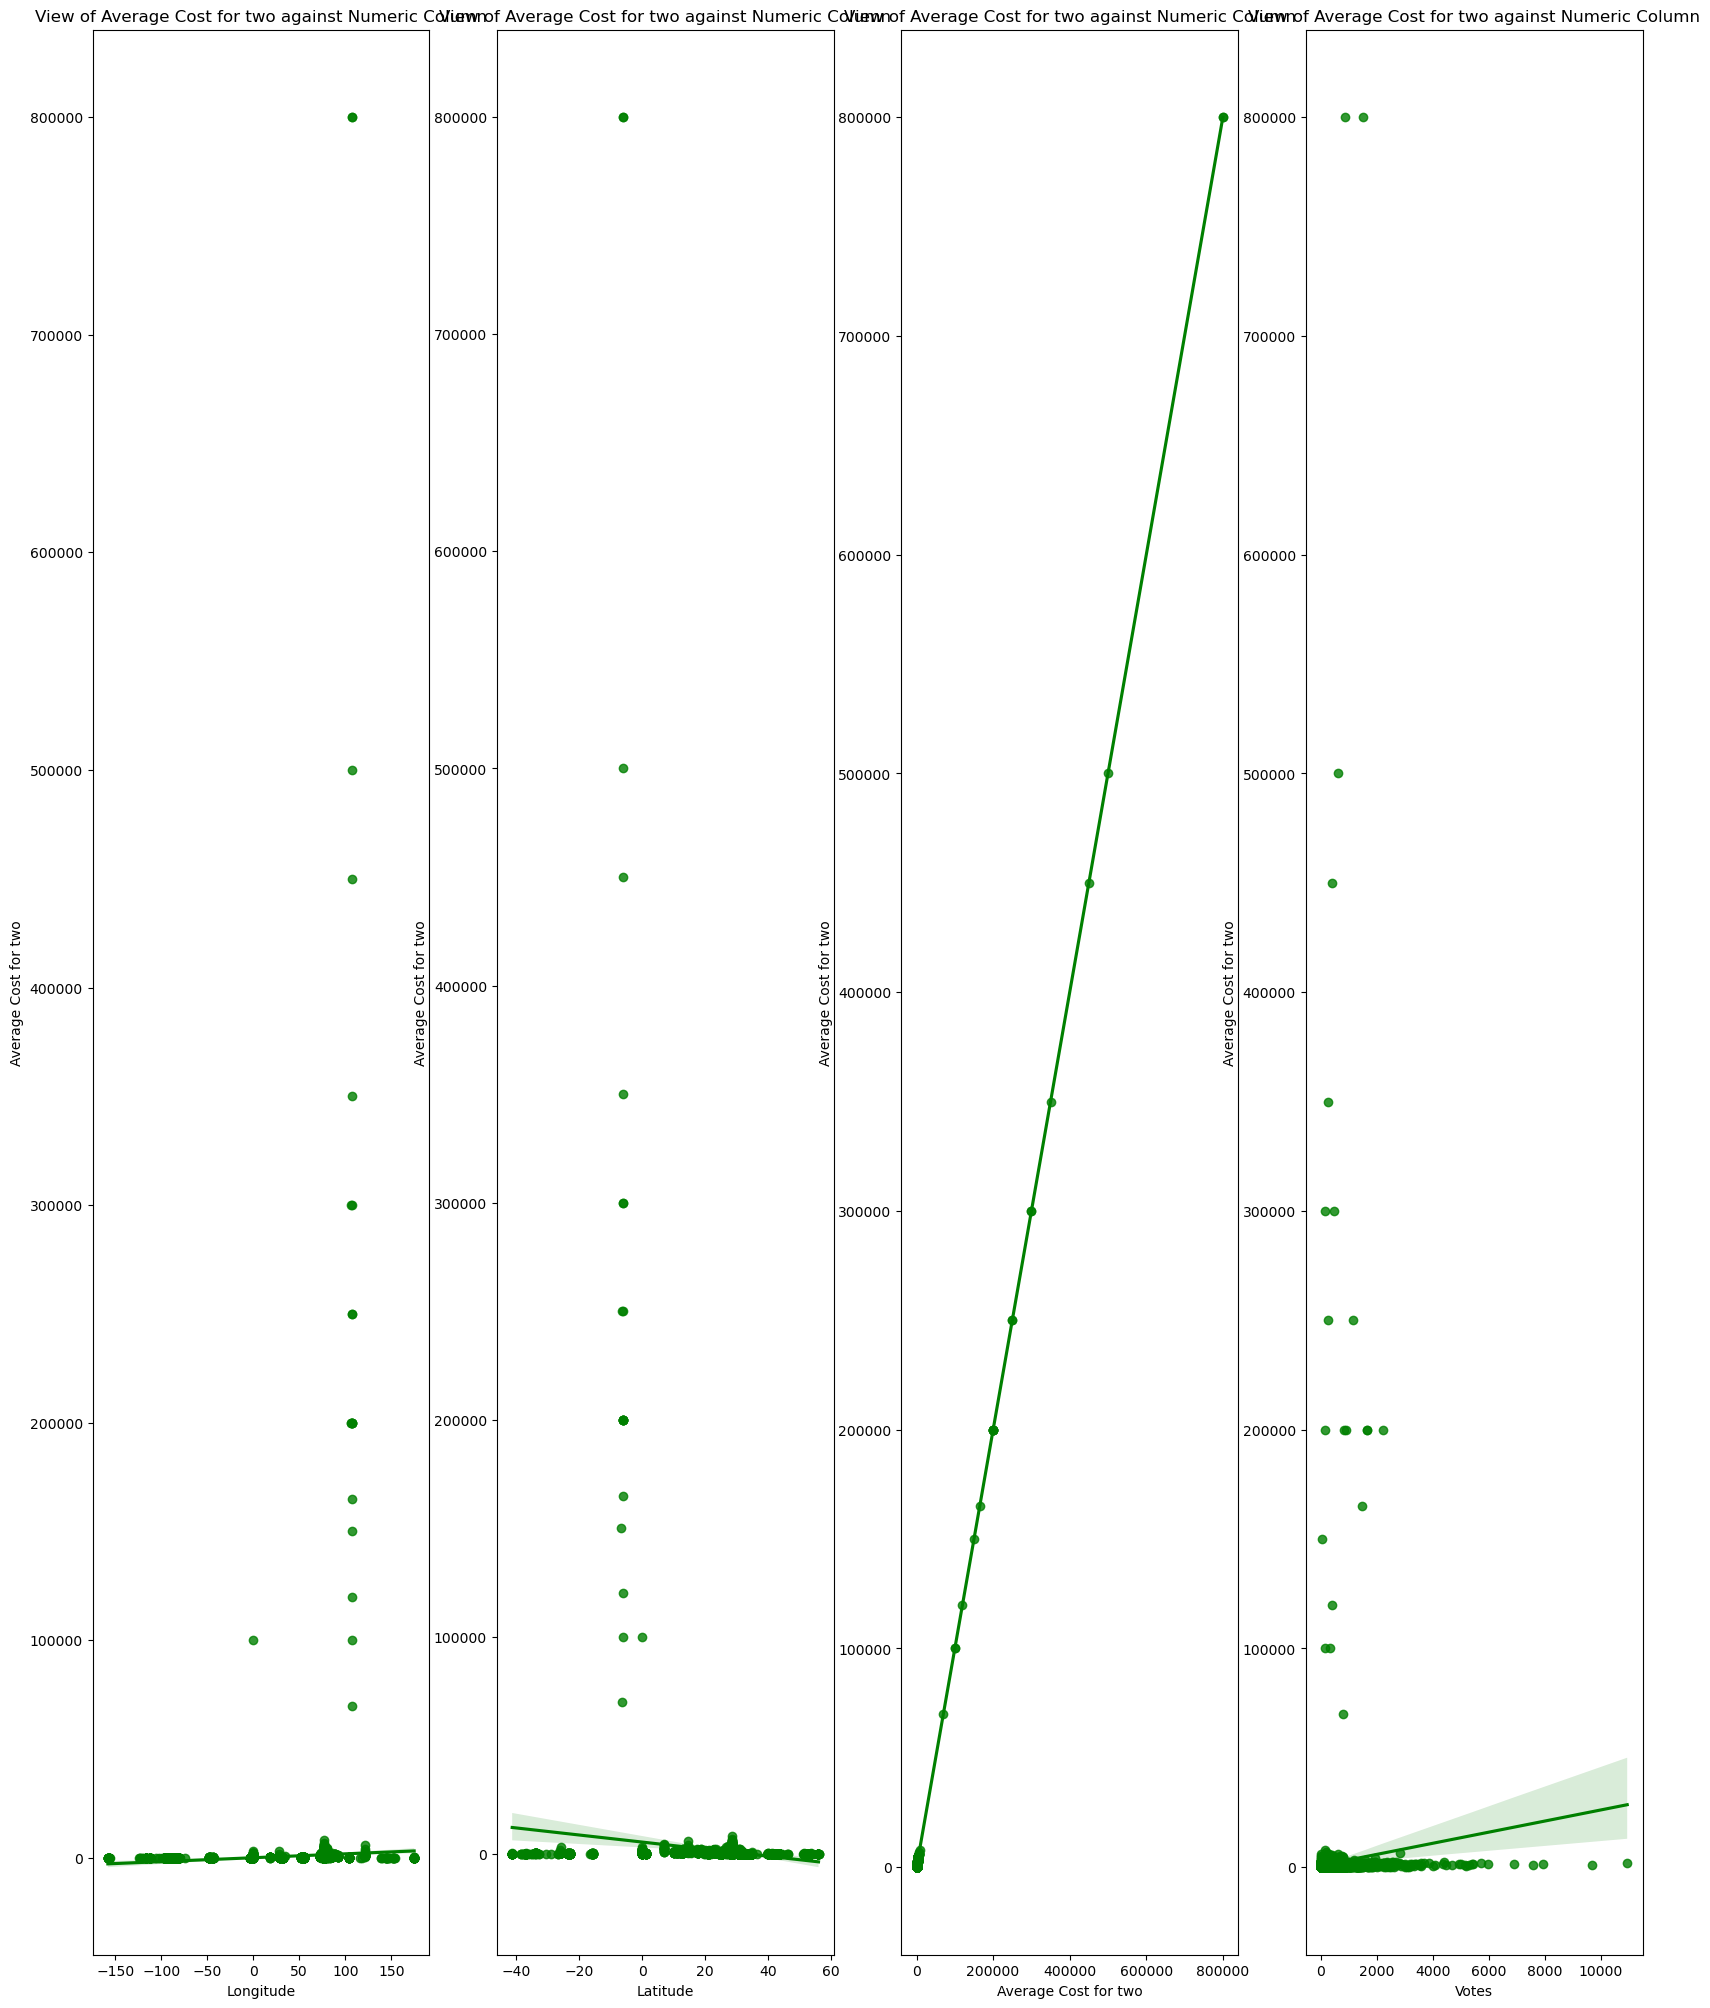

In [128]:


plt.figure(figsize = (20,25), facecolor = 'white')
p=1

for column in numerical:
    if p<=4:
        plt.subplot(1,4,p)
        sns.regplot(x=df[column],y='Average Cost for two',data=df,color='green')
        plt.title("View of Average Cost for two against Numeric Column")
      
    p+= 1
plt.show()
#there is a weak positive relationship between average cost for two and longitude as well as votes

# Multivariate analysis

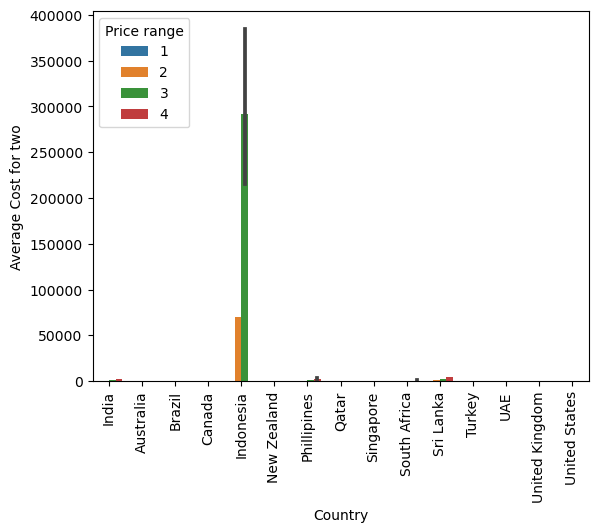

In [135]:
sns.barplot(x='Country',y='Average Cost for two',hue='Price range',data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()

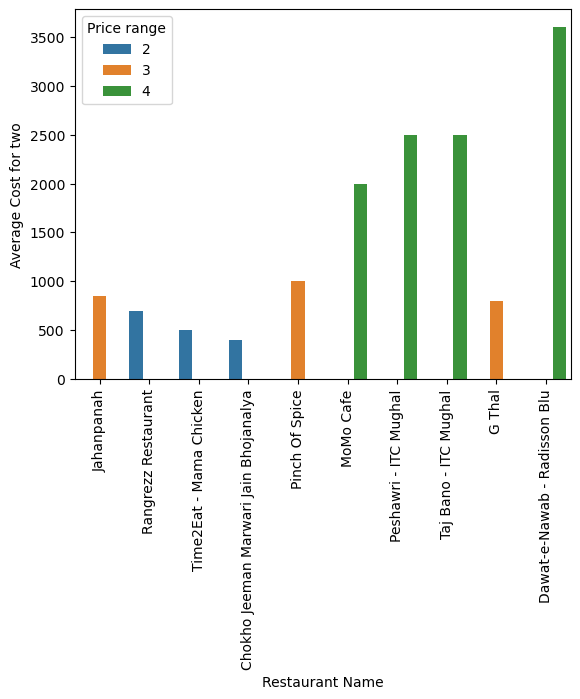

In [137]:
sns.barplot(x='Restaurant Name',y='Average Cost for two',hue='Price range',data=df[:10])
plt.xticks(rotation=90, fontsize=10)
plt.show()

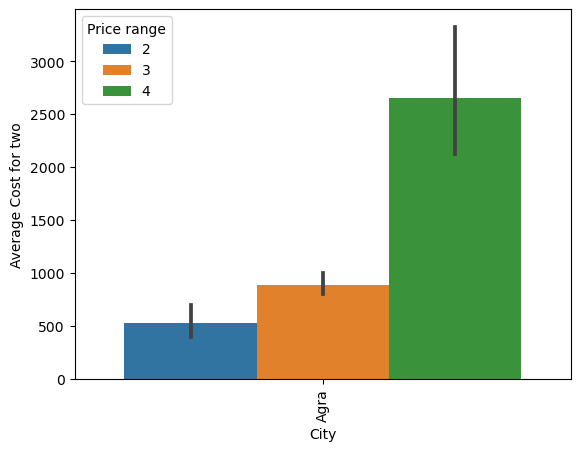

In [139]:
sns.barplot(x='City',y='Average Cost for two',hue='Price range',data=df[:10])
plt.xticks(rotation=90, fontsize=10)
plt.show()

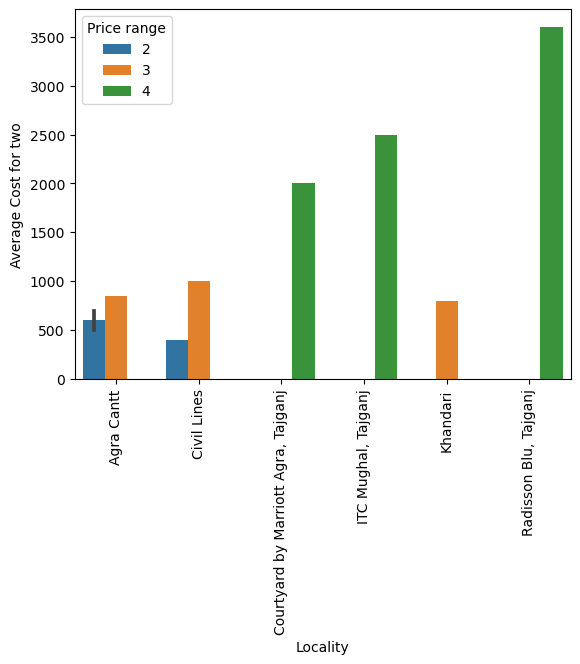

In [142]:
sns.barplot(x='Locality',y='Average Cost for two',hue='Price range',data=df[:10])
plt.xticks(rotation=90, fontsize=10)
plt.show()

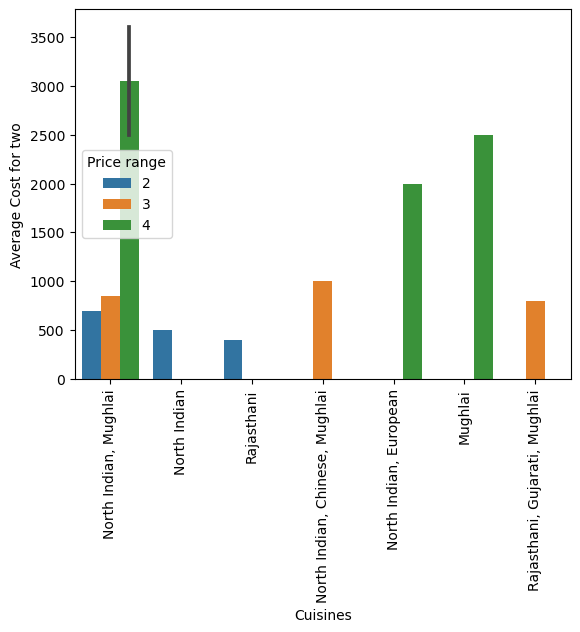

In [144]:
sns.barplot(x='Cuisines',y='Average Cost for two',hue='Price range',data=df[:10])
plt.xticks(rotation=90, fontsize=10)
plt.show()

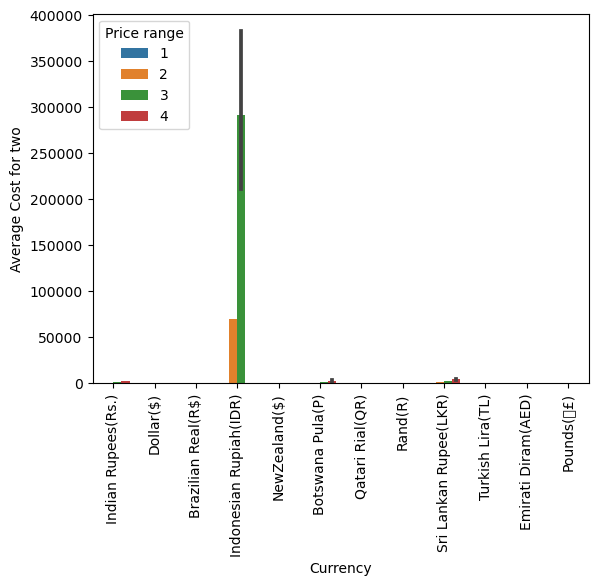

In [145]:
sns.barplot(x='Currency',y='Average Cost for two',hue='Price range',data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()

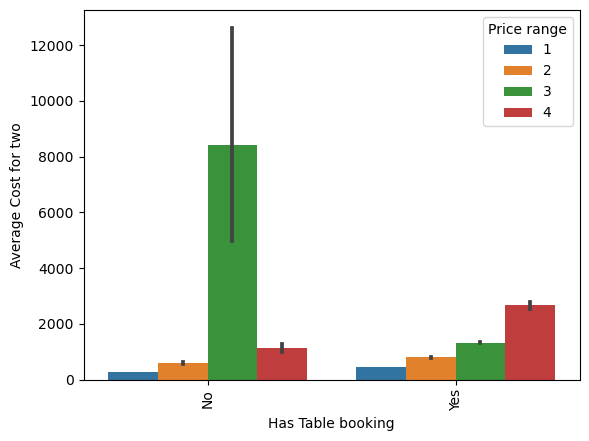

In [146]:
sns.barplot(x='Has Table booking',y='Average Cost for two',hue='Price range',data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()

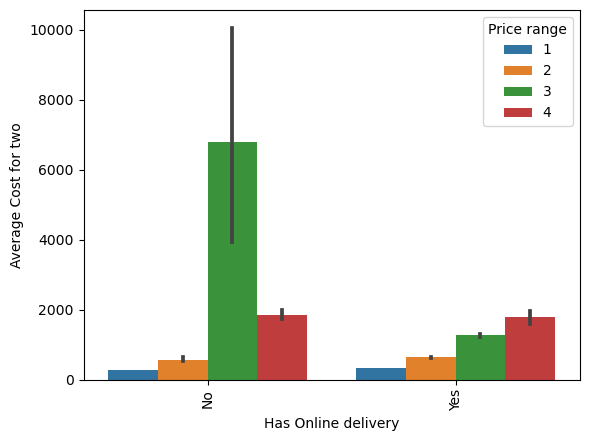

In [147]:
sns.barplot(x='Has Online delivery',y='Average Cost for two',hue='Price range',data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [ ]:
sns.barplot(x='Is delivering now',y='Average Cost for two',hue='Price range',data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()

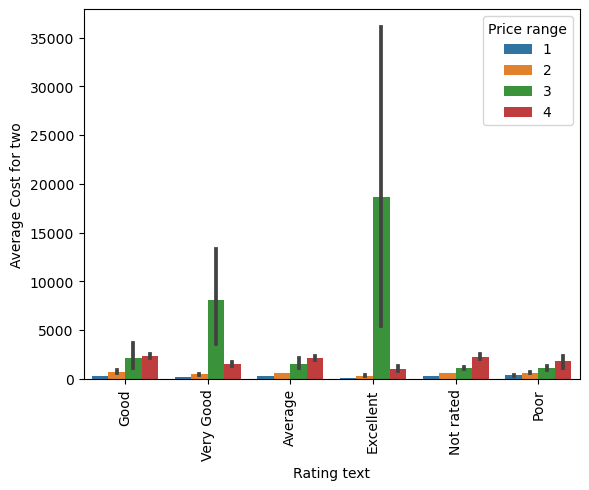

In [148]:
sns.barplot(x='Rating text',y='Average Cost for two',hue='Price range',data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()

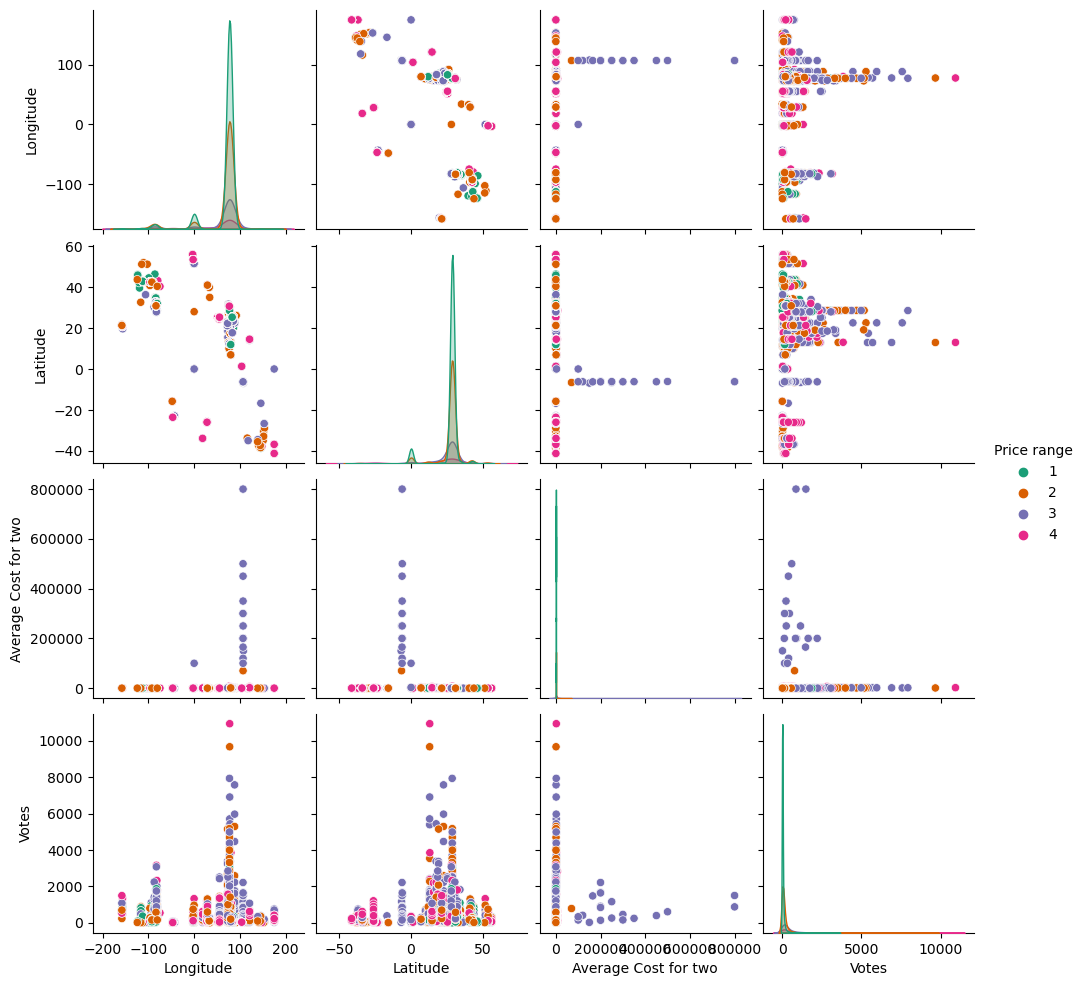

In [150]:
#Multivariate analysis
sns.pairplot(data =df,hue='Price range',palette="Dark2")
plt.show()
#the distribution of data is shown in  the middle diagonal column

# Transforming categorical into numerical data

In [152]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Country'] = le.fit_transform(df['Country'])

df['Price range'] = le.fit_transform(df['Price range'])

df['Restaurant Name'] = le.fit_transform(df['Restaurant Name'])

df['City'] = le.fit_transform(df['City'])

df['Locality'] = le.fit_transform(df['Locality'])

df['Cuisines'] = le.fit_transform(df['Cuisines'])

df['Currency'] = le.fit_transform(df['Currency'])

df['Has Table booking'] = le.fit_transform(df['Has Table booking'])

df['Has Online delivery'] = le.fit_transform(df['Has Online delivery'])

df['Is delivering now'] = le.fit_transform(df['Is delivering now'])

df['Rating text'] = le.fit_transform(df['Rating text'])

df.head(10)

,Country,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Rating text,Votes
0,3,3201,1,17,78.011544,27.161661,1514,850,4,0,0,0,2,2,140
1,3,5261,1,17,0.000000,0.000000,1514,700,4,0,0,0,1,2,71
2,3,6919,1,17,78.011608,27.160832,1306,500,4,0,0,0,1,2,94
3,3,1637,1,204,77.998092,27.195928,1645,400,4,0,0,0,1,5,87
4,3,4922,1,204,78.007553,27.201725,1373,1000,4,0,0,0,2,5,177
5,3,4211,1,226,0.000000,0.000000,1435,2000,4,0,0,0,3,5,45
6,3,4900,1,455,78.044095,27.160934,1514,2500,4,0,0,0,3,5,133
7,3,6246,1,455,78.044095,27.160934,1275,2500,4,0,0,0,3,5,41
8,3,2549,1,533,0.000000,0.000000,1646,800,4,0,0,0,2,2,59
9,3,1897,1,828,78.057044,27.163303,1514,3600,4,0,0,0,3,2,46


# Tabular view of Correlation

In [153]:

cor=df.corr()
cor

,Country,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Rating text,Votes
Country,1.000000,0.017560,-0.180959,-0.118784,-0.766221,0.181299,-0.124141,-0.004034,-0.105296,-0.062076,-0.140464,-0.016607,0.178035,0.203846,0.155161
Restaurant Name,0.017560,1.000000,-0.001399,0.004322,-0.001920,0.009922,0.051496,0.019241,0.009669,0.041173,0.028082,0.011984,0.061275,0.012131,0.018512
City,-0.180959,-0.001399,1.000000,0.096444,0.117391,-0.004301,0.025764,-0.028838,-0.071996,-0.003762,0.012723,-0.014039,-0.105759,-0.098985,-0.078406
Locality,-0.118784,0.004322,0.096444,1.000000,0.086448,-0.020424,0.006499,-0.012136,0.023723,-0.065594,-0.030993,-0.007299,-0.114459,-0.036969,-0.123569
Longitude,-0.766221,-0.001920,0.117391,0.086448,1.000000,0.043207,0.122457,0.045891,0.337334,0.100488,0.178757,0.018787,-0.078939,-0.181466,-0.085101
Latitude,0.181299,0.009922,-0.004301,-0.020424,0.043207,1.000000,0.038646,-0.111088,-0.101864,0.054658,0.118722,0.015001,-0.166688,-0.129447,-0.022962
Cuisines,-0.124141,0.051496,0.025764,0.006499,0.122457,0.038646,1.000000,0.005755,0.066783,0.050232,-0.017180,0.007708,-0.005489,-0.080025,-0.032362
Average Cost for two,-0.004034,0.019241,-0.028838,-0.012136,0.045891,-0.111088,0.005755,1.000000,0.045615,0.007758,-0.018974,-0.001862,0.075083,0.031439,0.067783
Currency,-0.105296,0.009669,-0.071996,0.023723,0.337334,-0.101864,0.066783,0.045615,1.000000,0.000640,0.006991,0.001458,0.075179,0.014598,-0.027111
Has Table booking,-0.062076,0.041173,-0.003762,-0.065594,0.100488,0.054658,0.050232,0.007758,0.000640,1.000000,0.101224,-0.016816,0.501925,0.044043,0.169422


# Visualizing the correlation matrix by plotting heatmap.

<Axes: >

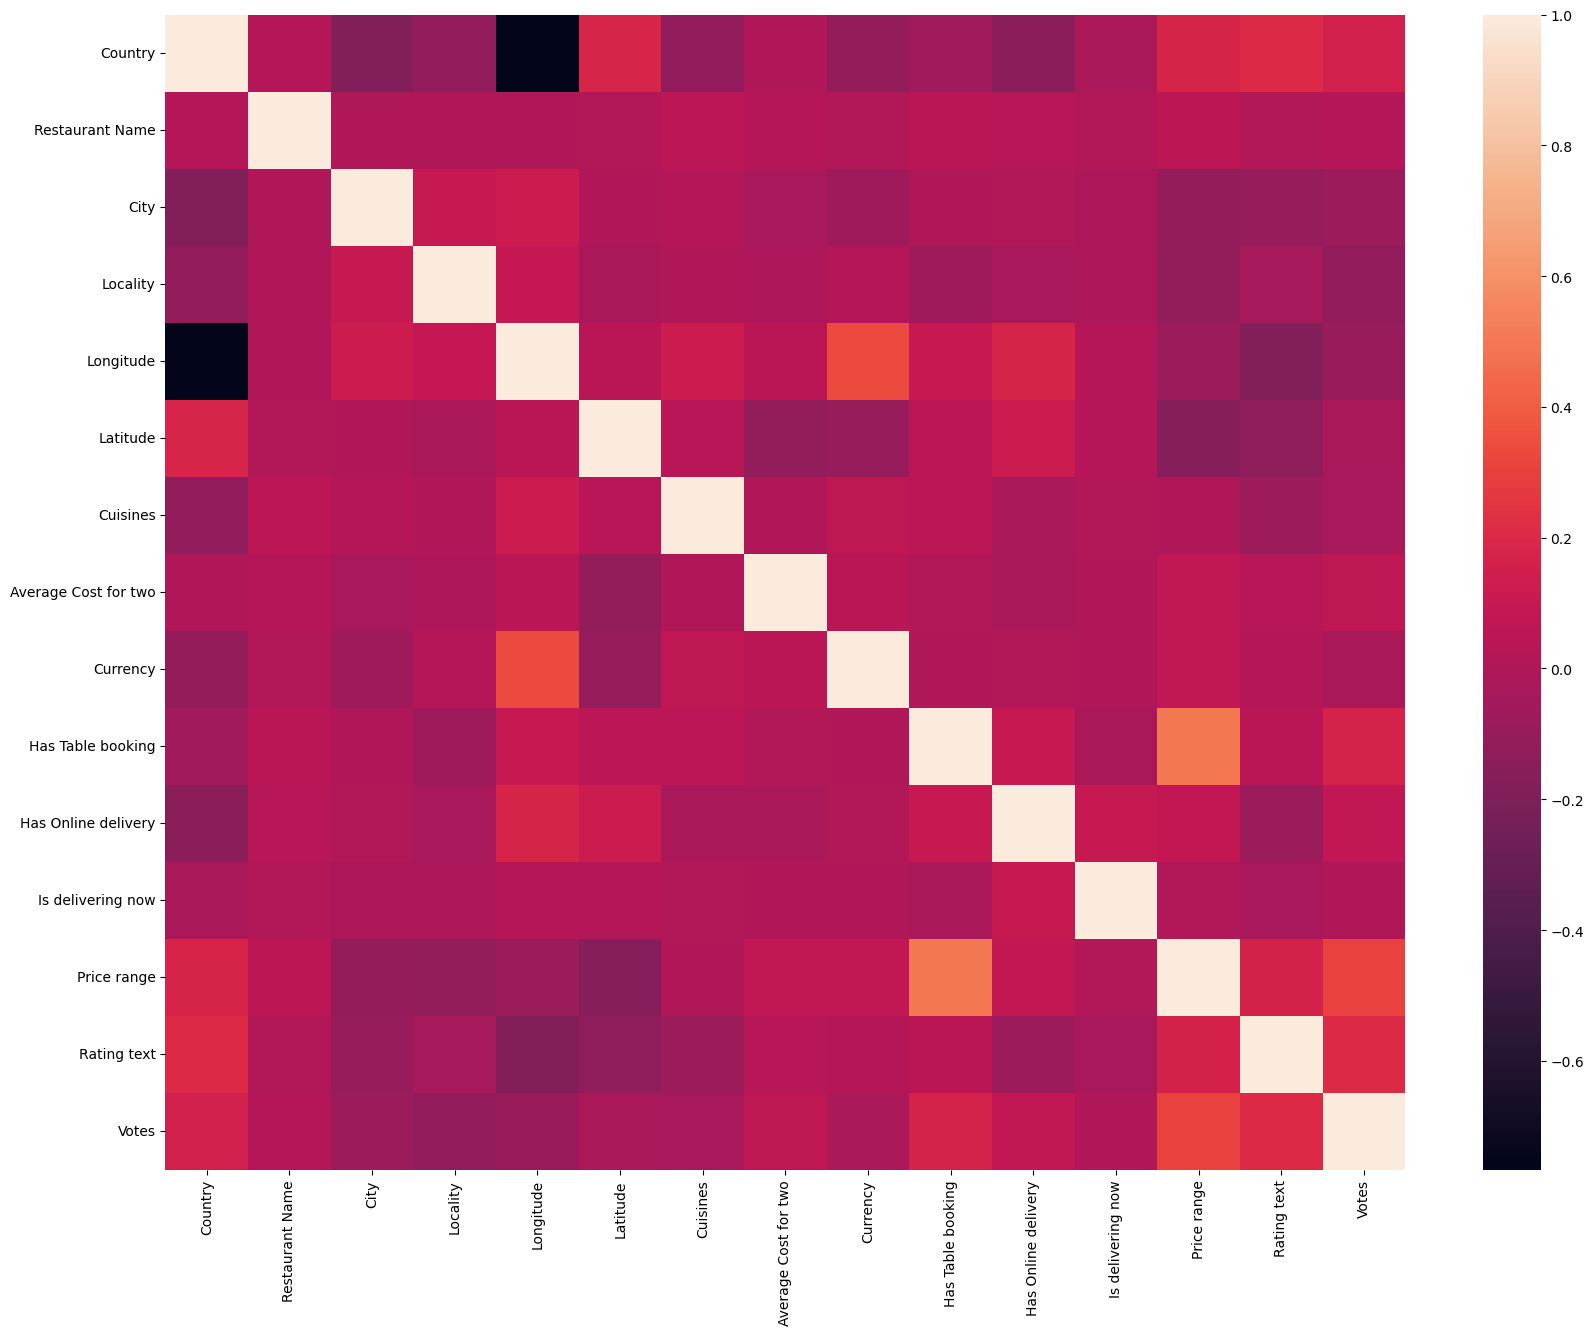

In [156]:

f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
sns.heatmap(df.corr())

In [ ]:
#The table  above demonstrate  multicollinearity which will be dealt with in Standard Scaling and VIF tool

# viewing  outliers using boxplot and dealing with them

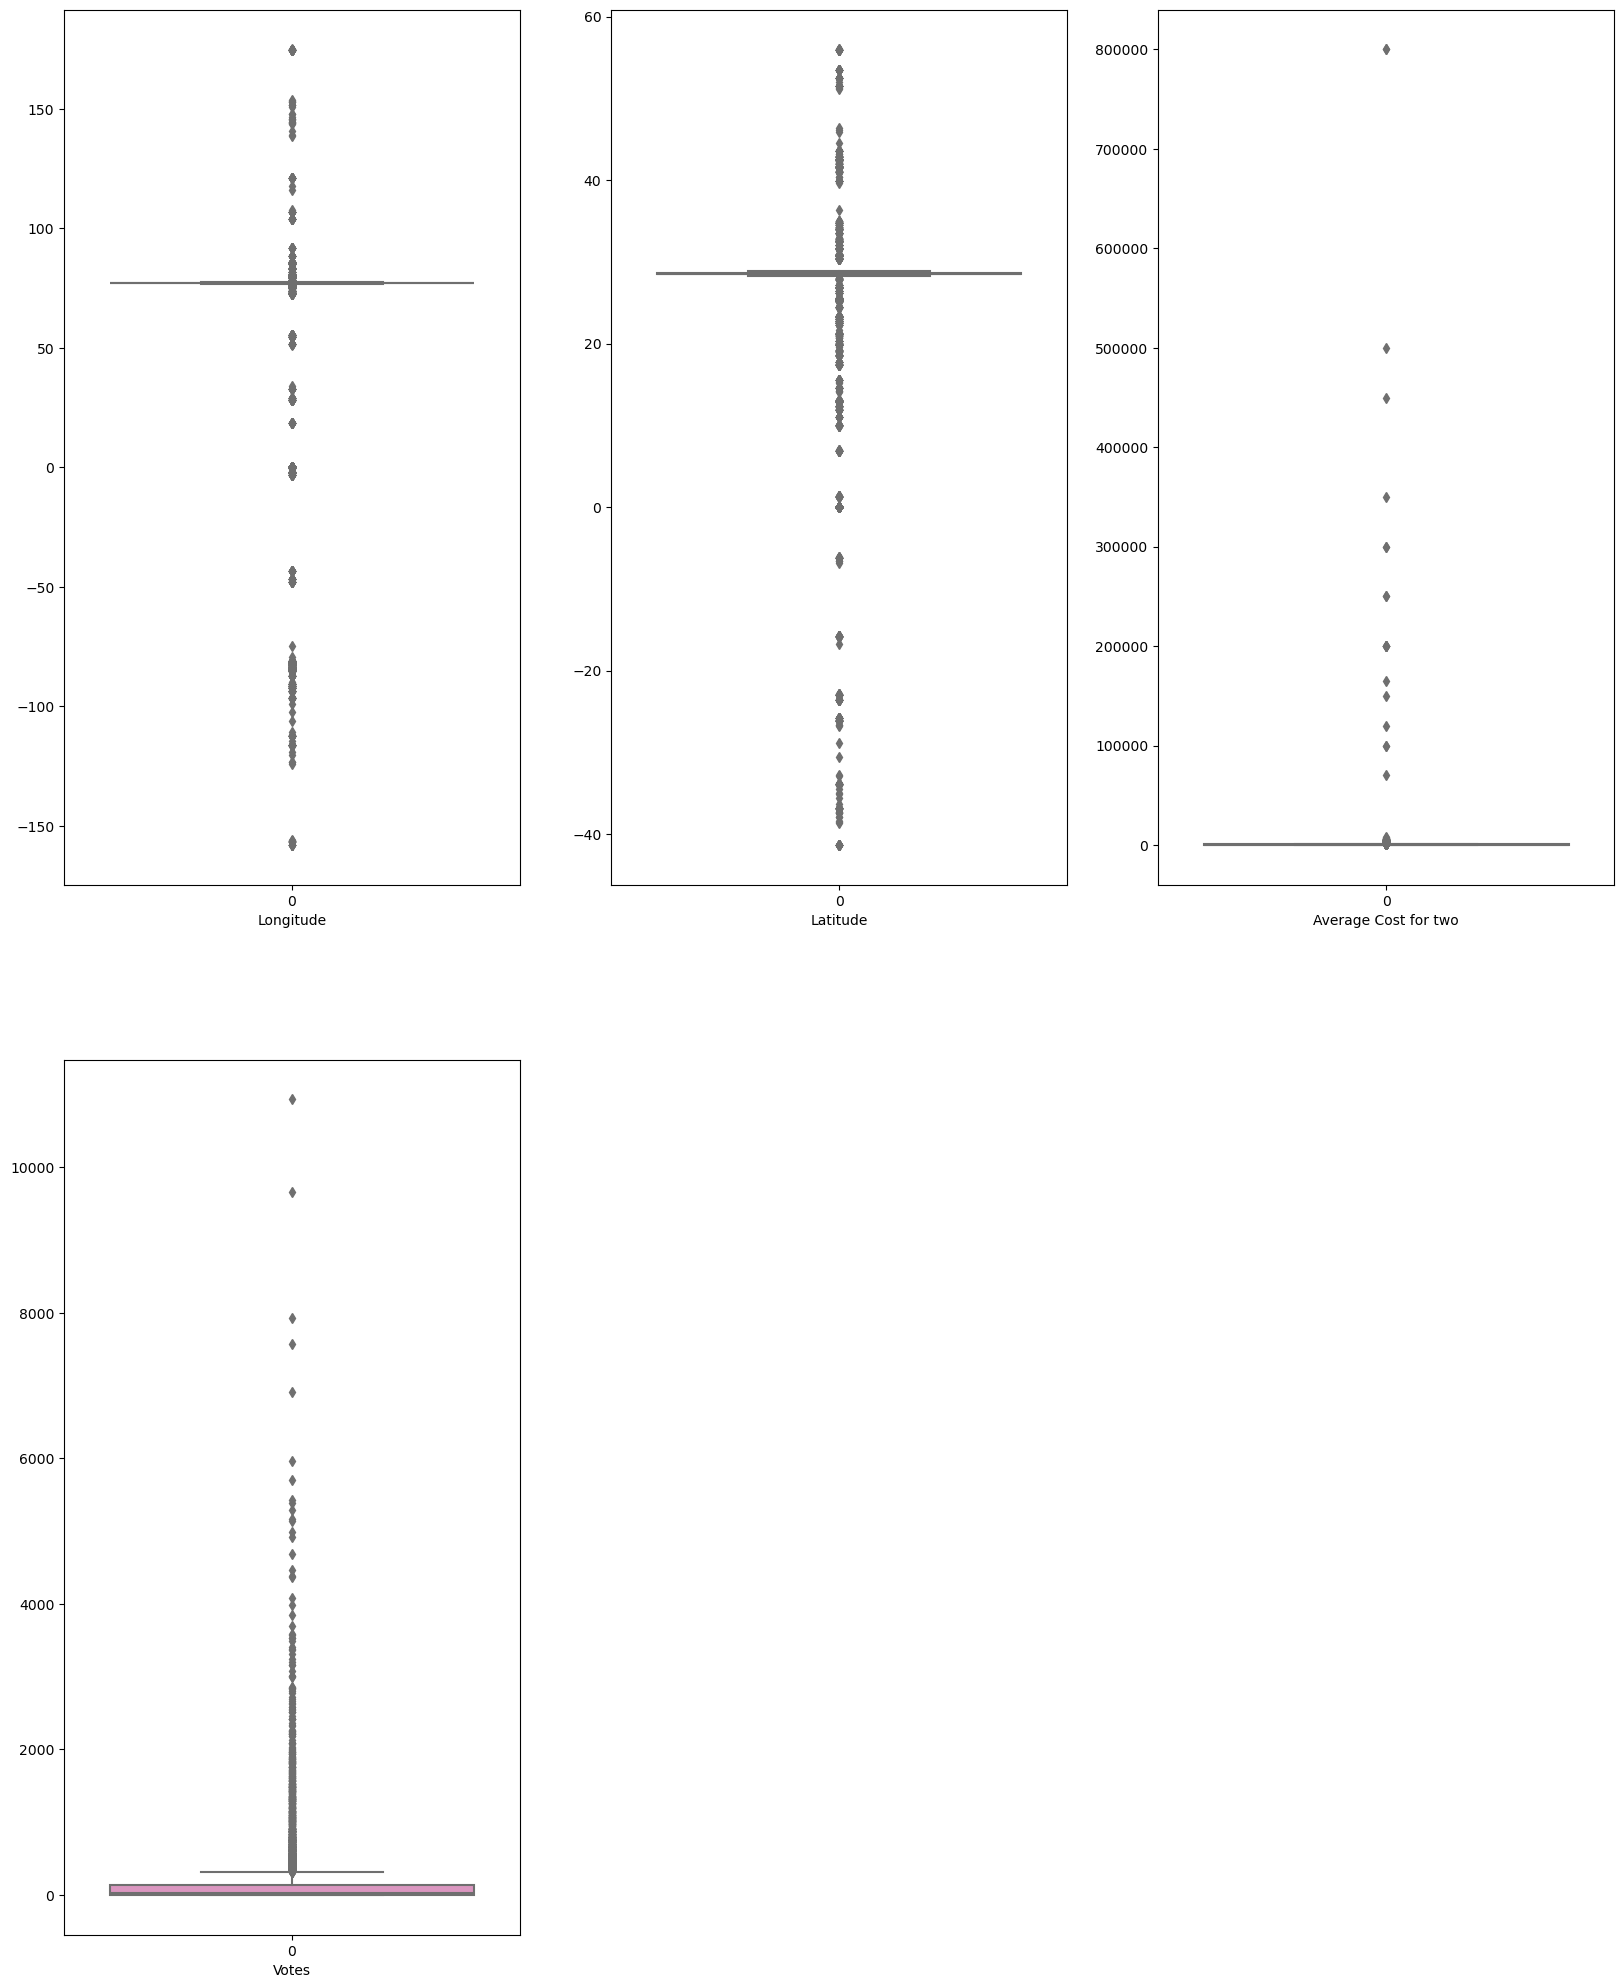

In [157]:
plt.figure(figsize=(20,25))
p=1
for column in numerical:
    if p<=5:
        plt.subplot(2,3,p)
        sns.boxplot(df[column], palette ="Set2_r")
        plt.xlabel(column)
        
    p+=1
    
plt.show()

# Remove outliers using zscore method

In [160]:

from scipy.stats import zscore
out_features=df[['Longitude','Latitude','Average Cost for two','Votes']]
z=np.abs(zscore(out_features))
z

,Longitude,Latitude,Average Cost for two,Votes
0,0.334861,0.118764,0.021663,0.039312
1,1.546527,2.348827,0.030968,0.199722
2,0.334862,0.118689,0.043374,0.146252
3,0.334536,0.121877,0.049578,0.162525
4,0.334765,0.122404,0.012358,0.046706
...,...,...,...,...
9546,3.773364,1.512081,0.073771,0.129978
9547,3.773370,1.512037,0.073771,0.229944
9548,3.773071,1.509099,0.072840,0.002115
9549,3.488640,1.321086,0.072840,0.002115


In [161]:
#removing the data above zscore and creating new dataframe
df1=df[(z<3).all(axis=1)]
df1.shape

(8756, 15)

In [162]:
print("Data Loss Percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)
#there is a 0.5% data loss when using zscore to remove outliers

Data Loss Percentage- 8.323735734478065


In [210]:
#making a copy of the dataframe
df=df1.copy()

In [164]:
#checking shape of the data
df.shape

(8756, 15)

In [165]:
#Checking for Skewness
df.skew()
#Skeweness is acceptable only within the range of -0.5 and 0.5.
#all the numerical  columns short of that criteria

Country                  6.224507
Restaurant Name          0.041834
City                    -1.499846
Locality                -0.305496
Longitude               -3.179687
Latitude                -2.246169
Cuisines                -0.343326
Average Cost for two     3.667387
Currency                 6.610471
Has Table booking        2.268965
Has Online delivery      1.016921
Is delivering now       15.956834
Price range              0.987956
Rating text              0.438078
Votes                    3.555810
dtype: float64

In [166]:
#Removing skeweness  using the cuberoot method
df.skew()

df['Votes']=np.cbrt(df['Votes'])

In [167]:
#check skeweness again
df.skew()
#skeweness partially removed

Country                  6.224507
Restaurant Name          0.041834
City                    -1.499846
Locality                -0.305496
Longitude               -3.179687
Latitude                -2.246169
Cuisines                -0.343326
Average Cost for two     3.667387
Currency                 6.610471
Has Table booking        2.268965
Has Online delivery      1.016921
Is delivering now       15.956834
Price range              0.987956
Rating text              0.438078
Votes                    0.743619
dtype: float64

In [168]:
#Removing skeweness in Votes using log1p method
df["Votes"]=np.log1p(df["Votes"])

In [169]:
#check skeweness again
df.skew()
#skeweness partially removed

Country                  6.224507
Restaurant Name          0.041834
City                    -1.499846
Locality                -0.305496
Longitude               -3.179687
Latitude                -2.246169
Cuisines                -0.343326
Average Cost for two     3.667387
Currency                 6.610471
Has Table booking        2.268965
Has Online delivery      1.016921
Is delivering now       15.956834
Price range              0.987956
Rating text              0.438078
Votes                   -0.609898
dtype: float64

In [171]:
#removing skeweness using power transform
from sklearn.preprocessing import power_transform
df[['Longitude','Latitude','Votes']] =power_transform(df[['Longitude','Latitude','Votes']].values)

In [172]:
#check skeweness again
df.skew()

Country                  6.224507
Restaurant Name          0.041834
City                    -1.499846
Locality                -0.305496
Longitude               -0.963748
Latitude                 0.409584
Cuisines                -0.343326
Average Cost for two     3.667387
Currency                 6.610471
Has Table booking        2.268965
Has Online delivery      1.016921
Is delivering now       15.956834
Price range              0.987956
Rating text              0.438078
Votes                   -0.160621
dtype: float64

In [ ]:
#skeweness has been removed from Votes and Latitude,I will now proceed

# checking distribution of data after attempting to remove skeweness

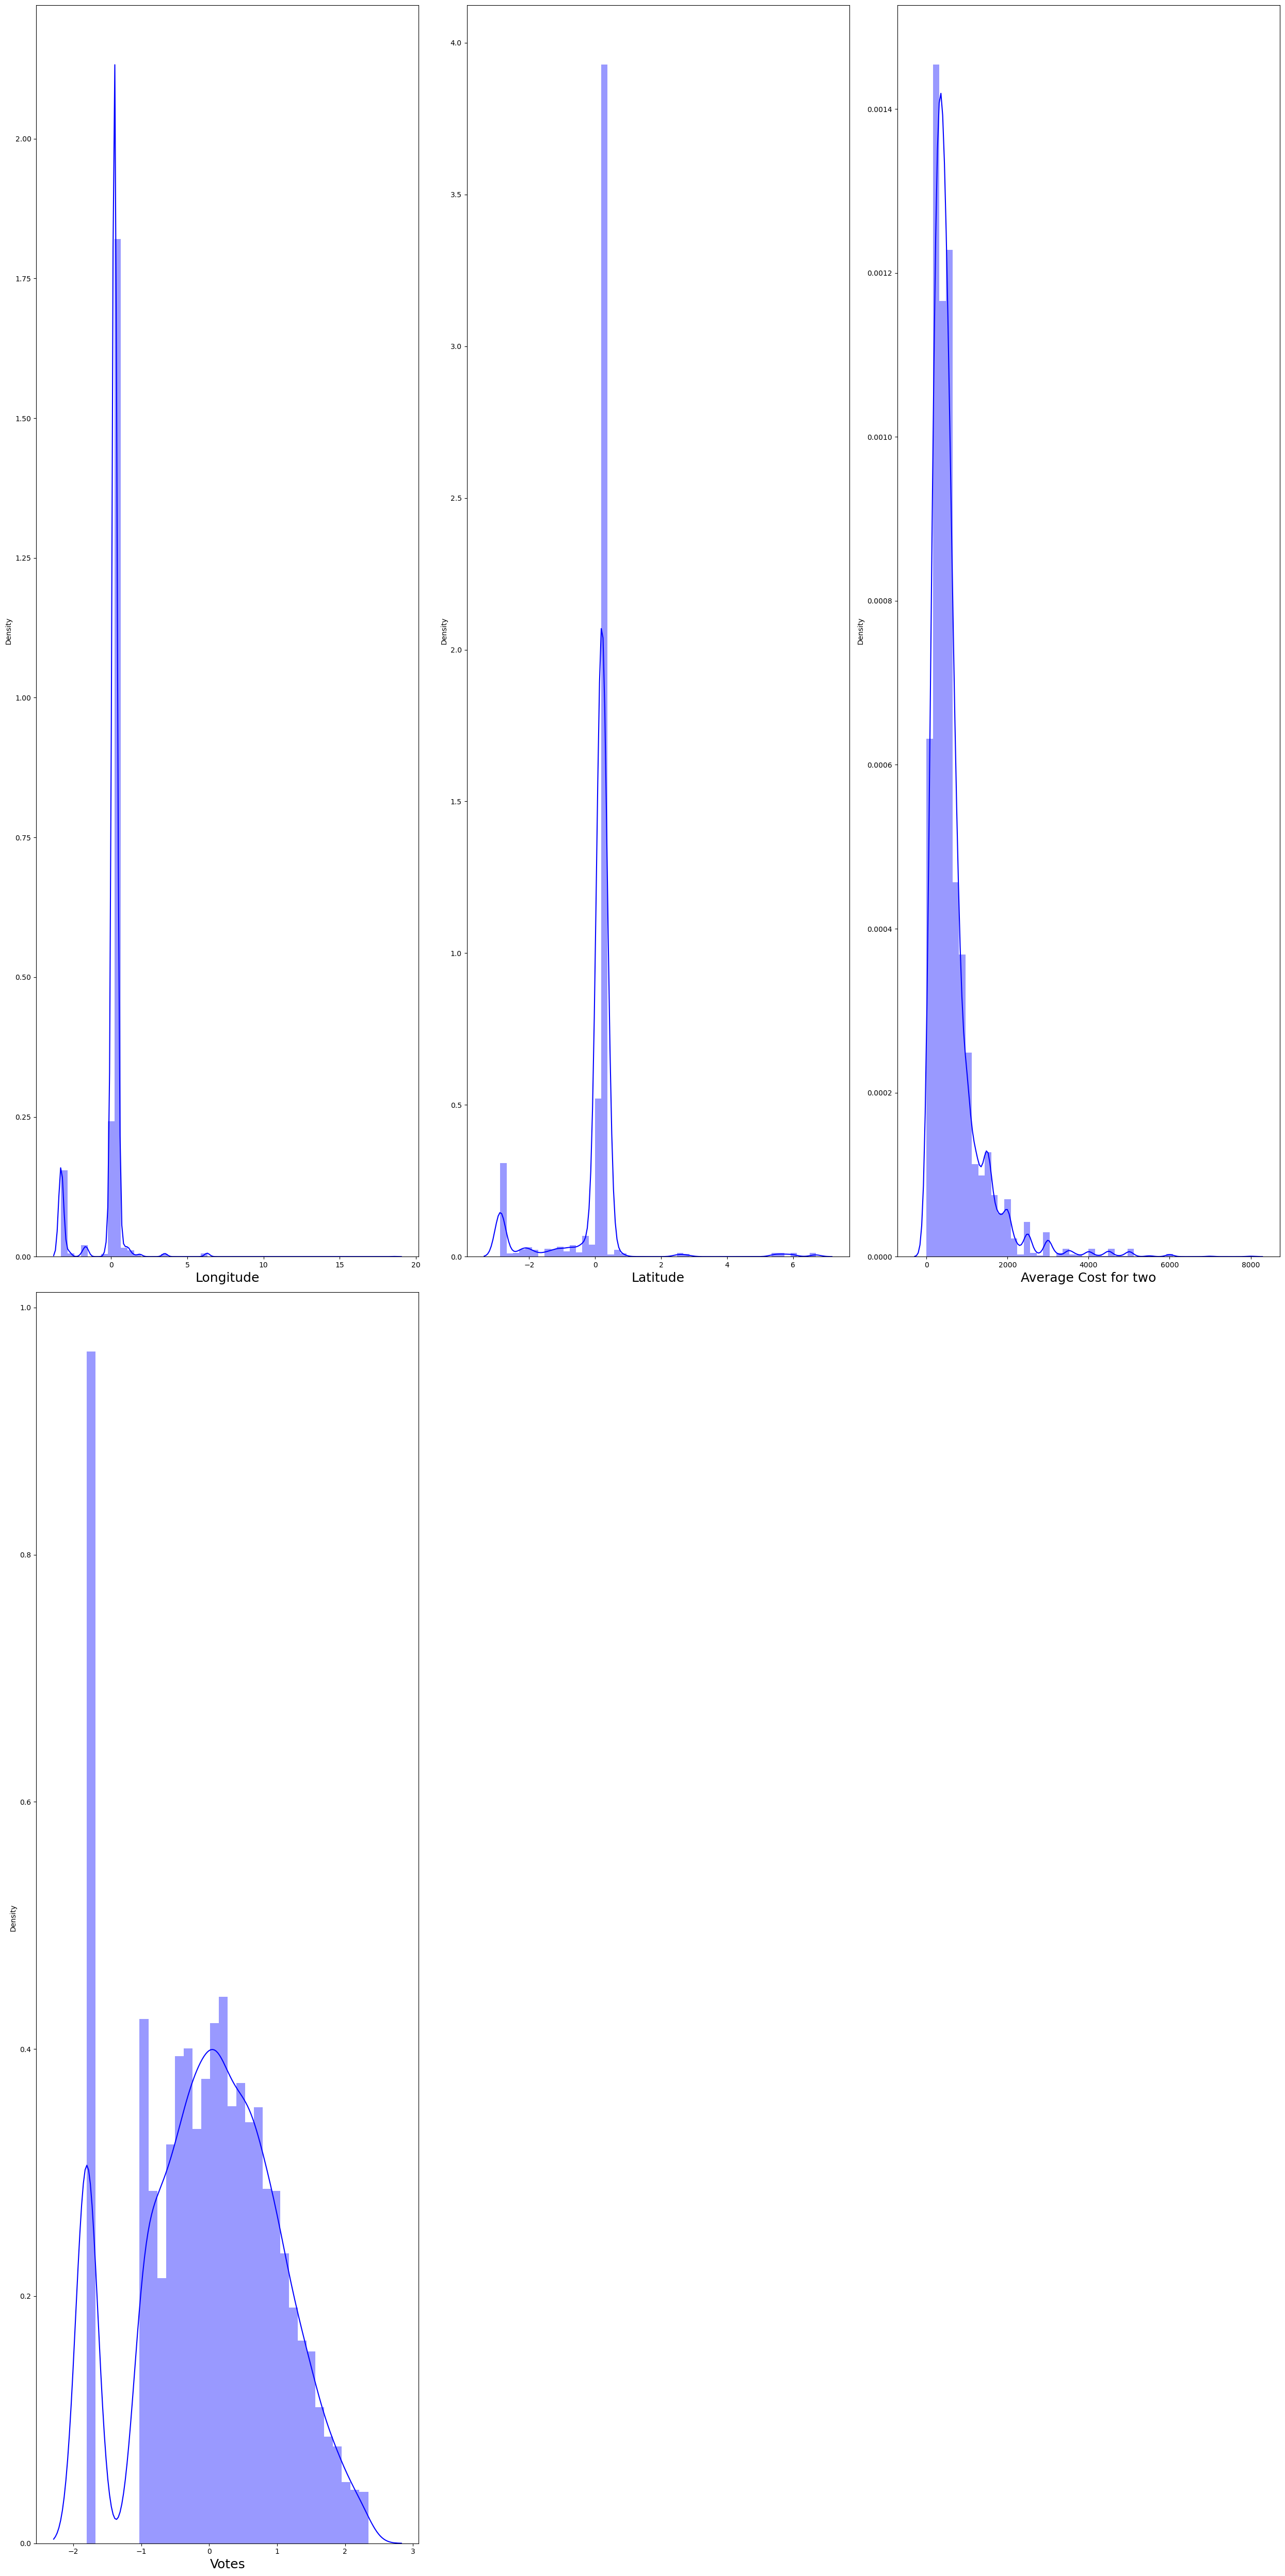

In [173]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical:
    if plotnumber <=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.tight_layout()

In [ ]:
#Dealing with multicollinearity.It be must removed but before that we need to seperate features and labels

In [174]:
#seperate the target and independent variables into x and y
x=df.drop("Average Cost for two",axis=1)
y=df["Average Cost for two"]
print("Feature Dimension=",x.shape)
print("Label Dimension=",y.shape)

Feature Dimension= (8756, 14)
Label Dimension= (8756,)


In [175]:
#Feature scaling and using standard scalarization to remove biasness
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Country,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Rating text,Votes
0,-0.164896,-0.208364,-3.817305,-2.116121,0.308199,-0.046351,1.001397,-0.084805,-0.377866,-0.61343,-0.062435,1.448044,0.201585,0.889302
1,-0.164896,0.753498,-3.817305,-2.116121,-3.280600,-2.875395,1.001397,-0.084805,-0.377866,-0.61343,-0.062435,0.297806,0.201585,0.533738
2,-0.164896,1.527657,-3.817305,-2.116121,0.308205,-0.046495,0.588857,-0.084805,-0.377866,-0.61343,-0.062435,0.297806,0.201585,0.676894
3,-0.164896,-0.938632,-3.817305,-1.509900,0.306819,-0.040389,1.261218,-0.084805,-0.377866,-0.61343,-0.062435,0.297806,2.038936,0.636879
4,-0.164896,0.595211,-3.817305,-1.509900,0.307789,-0.039380,0.721743,-0.084805,-0.377866,-0.61343,-0.062435,1.448044,2.038936,1.019360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8751,7.153037,-0.494121,-0.249771,1.119221,-3.281027,5.979089,-1.775312,4.415507,-0.377866,-0.61343,-0.062435,2.598282,-0.410865,1.757495
8752,7.153037,-1.603531,-0.249771,1.119221,-3.281028,5.977472,-0.027969,4.415507,-0.377866,-0.61343,-0.062435,0.297806,2.038936,1.473354
8753,7.153037,0.880502,-0.249771,1.119221,-3.281027,5.978851,0.043432,4.415507,-0.377866,-0.61343,-0.062435,0.297806,2.038936,1.895975
8754,7.153037,0.312256,-0.249771,1.316972,-3.281027,5.977713,-0.381007,4.415507,2.646442,-0.61343,-0.062435,1.448044,2.038936,0.504826


# Checking Variance inflation factor

In [176]:
#Checking Variance inflation factor in each scaled column that is x.shape[1](1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.870942,Country
1,1.009229,Restaurant Name
2,1.075405,City
3,1.042488,Locality
4,1.702801,Longitude
5,1.802399,Latitude
6,1.017090,Cuisines
7,1.789657,Currency
8,1.526225,Has Table booking
9,1.193183,Has Online delivery


In [ ]:
VIF values are less than 10 which is the threshold so I will proceed

In [178]:
#Modelling
#import the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [179]:
#Creating train test split
#Finding the best random state

maxAccu = 0
maxRS = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at random_state",maxRS)

Maximum r2 score is  0.7449380251672448 at random_state 3


In [180]:
#Import Regression algorithms

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor

In [181]:
#checking accuracy of Linear Regression

LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.6711250828255165
R2_score on training data: 70.09809428342118
Mean Absolute Error:- 176.15980195931192
Mean Squared Error:- 116737.81968143812
Root Mean Squared Error:- 341.66916700433785


In [182]:
#checking accuracy of RandomForestRegressor

RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 0.8656871562522314
R2_score on training data: 98.02331253864229
Mean Absolute Error:- 107.58612485725162
Mean Squared Error:- 47675.84183384088
Root Mean Squared Error:- 218.34798335189836


In [183]:
#checking accuracy of KNN Model

knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 0.7744838203828773
R2_score on training data: 85.60566497337275
Mean Absolute Error:- 138.65854586981348
Mean Squared Error:- 80049.48306052531
Root Mean Squared Error:- 282.93017347134486


In [184]:
#checking accuracy of the Gradient Boosting Regressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.8618816388581151
R2_score on training data: 89.53158720677615
Mean Absolute Error:- 115.64945505739212
Mean Squared Error:- 49026.652674526624
Root Mean Squared Error:- 221.41963028269788


In [185]:
#checking accuracy of the Lasso Regressor

lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: 0.6708640111542554
R2_score on training data: 70.09297169116661
Mean Absolute Error:- 175.66698450119492
Mean Squared Error:- 116830.489982796
Root Mean Squared Error:- 341.8047541840166


In [186]:
#checking accuracy of the Ridge Regressor

rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_rd))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.6711197369100284
R2_score on training data: 70.0980914467596
Mean Absolute Error:- 176.1329073513092
Mean Squared Error:- 116739.71727376187
Root Mean Squared Error:- 341.6719439371074


In [187]:
#checking accuracy of the Decision Tree Regressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score: 0.799420487641926
R2_score on training data: 100.0
Mean Absolute Error:- 135.59002664636466
Mean Squared Error:- 71197.93490673772
Root Mean Squared Error:- 266.8294116223654


In [189]:
#Cross validation Score-to compare and select an appropriate model for the predictive modelling problem.It prevents overfitting
from sklearn.model_selection import cross_val_score

In [190]:
#Checking CV score for Linear Regressor
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_LR)-score.mean())*100)

[ 0.61733356  0.74132256  0.74391509  0.63293742 -0.78492745]
0.39011623505868054
Difference between R2 score and cross validation score is - 28.1008847766836


In [191]:
#Checking CV score for Random Forest Regressor
score=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_RFR)-score.mean())*100)

[ 0.80699439  0.85371456  0.82449658  0.83115977 -0.15724826]
0.6318234080995125
Difference between R2 score and cross validation score is - 23.386374815271882


In [192]:
#Checking CV score for KNN model
score=cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_knn)-score.mean())*100)

[ 0.71977686  0.73796557  0.81060288  0.65347526 -0.04733072]
0.5748979683089346
Difference between R2 score and cross validation score is - 19.958585207394275


In [193]:
#Checking CV score for Gradient Boosting Regressor model
score=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_GBR)-score.mean())*100)

[ 0.82592115  0.8382186   0.8442413   0.78807892 -0.0552899 ]
0.6482340164303091
Difference between R2 score and cross validation score is - 21.3647622427806


In [194]:
#Checking CV score for Lasso Regressor model
score=cross_val_score(lasso,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_lasso)-score.mean())*100)

[ 0.63935733  0.742265    0.74425368  0.63155033 -0.62518416]
0.426448434129891
Difference between R2 score and cross validation score is - 24.441557702436445


In [195]:
#Checking CV score for Ridge Regressor model
score=cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_rd)-score.mean())

[ 0.61766805  0.74132392  0.7439231   0.63289289 -0.78269883]
0.39062182385121974
Difference between R2 score and cross validation score is - 0.2804979130588086


In [196]:
#Checking CV score for Decision tree regressor model
score=cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_dtr)-score.mean())*100)

[ 0.49130733  0.6863841   0.57860068  0.71099805 -0.37696447]
0.418065137318548
Difference between R2 score and cross validation score is - 38.1355350323378


# Model Selection

In [ ]:
I chose Ridge Regressor because it has the least difference between R2 score and CV score 

In [205]:
#Hyper parameter tuning

from sklearn.model_selection import GridSearchCV
parameters={'alpha' : [0.1, 0.3,0.5,'n_targets'], 
              'copy_X' : [True,False],
              'fit_intercept': [True,False],
              'tol':[0.1,0.3,0.5,1e-4]}
              

GVC=GridSearchCV(Ridge(),parameters,cv=5)
GVC.fit(x_train,y_train)

GVC.best_params_
{'alpha':1.0,'copy_X':True,'fit_intercept':True,'tol':1e-4}

Final_model=Ridge(alpha=1.0,copy_X=True,fit_intercept=True,tol=0.5)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred))
print('Mean Squared Error:-',mean_squared_error(y_test,pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.6711197369100284
Mean Absolute Error:- 176.1329073513092
Mean Squared Error:- 116739.71727376187
Root Mean Squared Error:- 341.6719439371074


# Saving the model

In [206]:
import joblib
joblib.dump(Final_model,"Zomato_Restaurant_Project_Average_Cost_for_two.pkl")

['Zomato_Restaurant_Project_Average_Cost_for_two.pkl']

In [207]:
#Loading the saved model to get predictions
model=joblib.load("Zomato_Restaurant_Project_Average_Cost_for_two.pkl")

In [208]:
#Prediction
prediction=model.predict(x_test)
prediction

array([ 613.91244161,  692.51123925,  279.1016845 , ..., 2041.62547136,
        724.81415839,  218.24481958])

In [209]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,613.912442,500
1,692.511239,500
2,279.101685,350
3,721.113991,650
4,1705.722211,3000
...,...,...
2622,685.552571,600
2623,724.075308,700
2624,2041.625471,3200
2625,724.814158,700


In [ ]:
#Second part of the solution is a classification Model as prescribed

In [211]:
#fetching my clean data frame saved earlier
df

,Country,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Rating text,Votes
0,3,3201,1,17,78.011544,27.161661,1514,850,4,0,0,0,2,2,140
1,3,5261,1,17,0.000000,0.000000,1514,700,4,0,0,0,1,2,71
2,3,6919,1,17,78.011608,27.160832,1306,500,4,0,0,0,1,2,94
3,3,1637,1,204,77.998092,27.195928,1645,400,4,0,0,0,1,5,87
4,3,4922,1,204,78.007553,27.201725,1373,1000,4,0,0,0,2,5,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,13,2589,74,1015,-2.247633,53.482261,114,80,7,0,0,0,3,1,602
9113,13,213,74,1015,-2.254833,53.476500,995,30,7,0,0,0,1,5,383
9114,13,5533,74,1015,-2.248848,53.481413,1031,25,7,0,0,0,1,5,745
9115,13,4316,74,1076,-2.245034,53.477358,817,55,7,1,0,0,2,5,67


In [212]:
#check VIF
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif
#there is no multicollinearity

,VIF values,Features
0,1.870942,Country
1,1.009229,Restaurant Name
2,1.075405,City
3,1.042488,Locality
4,1.702801,Longitude
5,1.802399,Latitude
6,1.017090,Cuisines
7,1.789657,Currency
8,1.526225,Has Table booking
9,1.193183,Has Online delivery


In [213]:
#seperate the target and independent variables into x and y
x=df.drop("Price range",axis=1)
y=df["Price range"]
print("Feature Dimension=",x.shape)
print("Label Dimension=",y.shape)

Feature Dimension= (8756, 14)
Label Dimension= (8756,)


In [214]:
#Feature scaling and using standard scalarization to remove biasness
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Country,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Rating text,Votes
0,-0.164896,-0.208364,-3.817305,-2.116121,0.305602,0.073786,1.001397,0.413595,-0.084805,-0.377866,-0.61343,-0.062435,0.201585,0.218348
1,-0.164896,0.753498,-3.817305,-2.116121,-3.643774,-3.503056,1.001397,0.161164,-0.084805,-0.377866,-0.61343,-0.062435,0.201585,-0.145898
2,-0.164896,1.527657,-3.817305,-2.116121,0.305605,0.073677,0.588857,-0.175411,-0.084805,-0.377866,-0.61343,-0.062435,0.201585,-0.024483
3,-0.164896,-0.938632,-3.817305,-1.509900,0.304921,0.078298,1.261218,-0.343699,-0.084805,-0.377866,-0.61343,-0.062435,2.038936,-0.061435
4,-0.164896,0.595211,-3.817305,-1.509900,0.305400,0.079062,0.721743,0.666026,-0.084805,-0.377866,-0.61343,-0.062435,2.038936,0.413668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8751,7.153037,-0.494121,-0.249771,1.119221,-3.757562,3.539870,-1.775312,-0.882219,4.415507,-0.377866,-0.61343,-0.062435,-0.410865,2.657214
8752,7.153037,-1.603531,-0.249771,1.119221,-3.757927,3.539112,-0.027969,-0.966362,4.415507,-0.377866,-0.61343,-0.062435,2.038936,1.501128
8753,7.153037,0.880502,-0.249771,1.119221,-3.757624,3.539759,0.043432,-0.974777,4.415507,-0.377866,-0.61343,-0.062435,2.038936,3.412102
8754,7.153037,0.312256,-0.249771,1.316972,-3.757430,3.539225,-0.381007,-0.924290,4.415507,2.646442,-0.61343,-0.062435,2.038936,-0.167014


In [215]:
#Modelling

#Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"at random_state",maxRS)

Best accuracy is  0.9870574800152265 at random_state 142


In [217]:
#creating train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [218]:
#Import classification algorithms

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [219]:
#checking accuracy for Random Forest Classifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9859154929577465
[[1297    3    0    0]
 [  10  848    3    0]
 [   0    3  332    4]
 [   0    1   13  113]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1300
           1       0.99      0.98      0.99       861
           2       0.95      0.98      0.97       339
           3       0.97      0.89      0.93       127

    accuracy                           0.99      2627
   macro avg       0.98      0.96      0.97      2627
weighted avg       0.99      0.99      0.99      2627



In [220]:
#checking testing accuracy:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.7879710696612106
[[1151  148    1    0]
 [ 214  601   46    0]
 [  12   95  227    5]
 [   0    2   34   91]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.71      0.70      0.70       861
           2       0.74      0.67      0.70       339
           3       0.95      0.72      0.82       127

    accuracy                           0.79      2627
   macro avg       0.81      0.74      0.77      2627
weighted avg       0.79      0.79      0.79      2627



In [221]:
#checking accuracy of Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.952797868290826
[[1289   11    0    0]
 [  15  825   20    1]
 [   0   34  296    9]
 [   0    4   30   93]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1300
           1       0.94      0.96      0.95       861
           2       0.86      0.87      0.86       339
           3       0.90      0.73      0.81       127

    accuracy                           0.95      2627
   macro avg       0.92      0.89      0.90      2627
weighted avg       0.95      0.95      0.95      2627



In [222]:
#checking accuracy for Support Vector Machine Classifier
SVC=SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test,predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

0.9398553483060526
[[1270   29    1    0]
 [  48  791   21    1]
 [   0   28  304    7]
 [   0    0   23  104]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1300
           1       0.93      0.92      0.93       861
           2       0.87      0.90      0.88       339
           3       0.93      0.82      0.87       127

    accuracy                           0.94      2627
   macro avg       0.92      0.90      0.91      2627
weighted avg       0.94      0.94      0.94      2627



In [223]:
#checking accuracy for Gradient Boosting Classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9847735059002665
[[1300    0    0    0]
 [  11  842    8    0]
 [   0    8  323    8]
 [   0    0    5  122]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1300
           1       0.99      0.98      0.98       861
           2       0.96      0.95      0.96       339
           3       0.94      0.96      0.95       127

    accuracy                           0.98      2627
   macro avg       0.97      0.97      0.97      2627
weighted avg       0.98      0.98      0.98      2627



In [224]:
#checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8176627331556909
[[1299    1    0    0]
 [  18  829   14    0]
 [   0  319   20    0]
 [   0  103   24    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1300
           1       0.66      0.96      0.78       861
           2       0.34      0.06      0.10       339
           3       0.00      0.00      0.00       127

    accuracy                           0.82      2627
   macro avg       0.50      0.51      0.47      2627
weighted avg       0.75      0.82      0.76      2627



In [225]:
#checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9870574800152265
[[1296    4    0    0]
 [   6  853    2    0]
 [   0    4  329    6]
 [   0    2   10  115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1300
           1       0.99      0.99      0.99       861
           2       0.96      0.97      0.97       339
           3       0.95      0.91      0.93       127

    accuracy                           0.99      2627
   macro avg       0.97      0.97      0.97      2627
weighted avg       0.99      0.99      0.99      2627



In [226]:
#checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9604111153406928
[[1283   17    0    0]
 [  13  825   23    0]
 [   0   20  311    8]
 [   0    0   23  104]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1300
           1       0.96      0.96      0.96       861
           2       0.87      0.92      0.89       339
           3       0.93      0.82      0.87       127

    accuracy                           0.96      2627
   macro avg       0.94      0.92      0.93      2627
weighted avg       0.96      0.96      0.96      2627



In [227]:
#Cross validation Score
from sklearn.model_selection import cross_val_score

In [228]:
#Checking CV score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predRFC)-score.mean())

[0.62671233 0.96573387 0.9988578  0.98972016 0.83038264]
0.8822813578151036
Difference between Accuracy score and cross validation score is - 0.10363413514264286


In [229]:
#Checking CV score for KNeighbours Classifier
score=cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predKNN)-score.mean())

[0.55365297 0.63792119 0.74985722 0.80239863 0.67961165]
0.6846883320424858
Difference between Accuracy score and cross validation score is - 0.10328273761872475


In [230]:
#Checking CV score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predLR)-score.mean())

[0.92694064 0.93146773 0.97772701 0.96858938 0.83723587]
0.9283921255694724
Difference between Accuracy score and cross validation score is - 0.02440574272135365


In [231]:
#Checking CV score for Support Vector Machine Classifier
score=cross_val_score(SVC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predSVC)-score.mean())

[0.79851598 0.89263278 0.96230725 0.95830954 0.83495146]
0.8893434019438338
Difference between Accuracy score and cross validation score is - 0.050511946362218785


In [232]:
#Checking CV score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predGB)-score.mean())

[0.58847032 0.96516276 1.         0.99543118 0.80525414]
0.8708636812884484
Difference between Accuracy score and cross validation score is - 0.11390982461181809


In [233]:
#Checking CV score for AdaBoost Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predABC)-score.mean())

[0.80422374 0.80925186 0.81896059 0.8195317  0.38606511]
0.727606599229664
Difference between Accuracy score and cross validation score is - 0.09005613392602696


In [234]:
#Checking CV score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predBC)-score.mean())

[0.57648402 0.95945174 1.         0.99657339 0.83095374]
0.872692577496486
Difference between Accuracy score and cross validation score is - 0.11436490251874054


In [235]:
#Checking CV score for ExtraTreesClassifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predET)-score.mean())

[0.55136986 0.88406625 0.98058252 0.97030268 0.82809823]
0.8428839097814947
Difference between Accuracy score and cross validation score is - 0.11752720555919804


# Model selection

In [ ]:
I chose logistic regression model as it has the least differnce between accuracy score and Cv score

# Hyper parameter tuning

In [237]:
from sklearn.model_selection import RandomizedSearchCV
parameters={'penalty' : ['l1', 'l2', 'elasticnet', None], 
              'dual' : [True,False],
              'C' : [0.1, 0.2, 0.3, 0.5, 1.0], 
              'fit_intercept': [True,False],
              'random_state':[10,12,14,20, None]}

random_cv=RandomizedSearchCV(LogisticRegression(),parameters,cv=5)
model=LogisticRegression()
random_cv=RandomizedSearchCV(estimator=model,
                             param_distributions=parameters,
                             cv=5,
                             n_iter=10,
                             scoring='accuracy',
                             verbose=5,
                             return_train_score=True)
random_cv.fit(x_train,y_train)

Final_model=LogisticRegression()
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=0.5, dual=False, fit_intercept=True, penalty=elasticnet, random_state=14;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.5, dual=False, fit_intercept=True, penalty=elasticnet, random_state=14;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.5, dual=False, fit_intercept=True, penalty=elasticnet, random_state=14;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.5, dual=False, fit_intercept=True, penalty=elasticnet, random_state=14;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.5, dual=False, fit_intercept=True, penalty=elasticnet, random_state=14;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1.0, dual=False, fit_intercept=True, penalty=l2, random_state=14;, score=(train=0.937, test=0.949) total time=   0.0s
[CV 2/5] END C=1.0, dual=False, fit_intercept=True, penalty=l2, random_state=14;, score=(train=0.942, test=0.938) total t

# Saving the model

In [238]:
import joblib
joblib.dump(Final_model,"Zomato_Restaurant_Project_Price_range.pkl")

['Zomato_Restaurant_Project_Price_range.pkl']

In [239]:
#loading the saved model to get predictions
model=joblib.load("Zomato_Restaurant_Project_Price_range.pkl")

In [240]:
#Prediction
prediction=model.predict(x_test)
prediction

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [241]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df
#the predictions for Price range

,Predicted,Original
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
2622,0,0
2623,0,0
2624,1,1
2625,0,0
